# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S15 T01: Unsupervised Classification
### [Github Unsupervised Classification](https://github.com/jesussantana/Unsupervised-Classification)
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
import seaborn as sns
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# ==============================================================================
# Auto Import Dependencies
# ==============================================================================
# pyforest imports dependencies according to use in the notebook
# ==============================================================================
import pyforest

# %pip install --upgrade pyforest
# !python -m pyforest install_extensions

In [2]:
# Check pyforest dependencies
# ==============================================================================

lazy_imports()

['import glob',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn import svm',
 'import pandas as pd',
 'from sklearn.linear_model import LogisticRegression',
 'import re',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.model_selection import GridSearchCV',
 'from pathlib import Path',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import RobustScaler',
 'import cv2',
 'import imutils',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.cluster import KMeans',
 'import seaborn as sns',
 'import tensorflow as tf',
 'import bokeh',
 'import xgboost as xgb',
 'import pydot',
 'import numpy as np',
 'import dash',
 'import 

In [3]:
# Dependencies not Included in Auto Import*
# ==============================================================================

# Data wrangling
# ==============================================================================
import missingno as msno 

# Clustering
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering

# Metrics
# ==============================================================================
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Others Plots
# ==============================================================================
from yellowbrick.cluster import SilhouetteVisualizer

# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Classify the different flights

In [4]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

In [5]:
df = df_raw.copy()

## Exploratory analysis

In [6]:
df.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [7]:
df = df.rename(columns={"Unnamed: 0": "ID"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [9]:
df.shape

(1936758, 30)

In [10]:
df.isna().sum().sort_values()

ID                        0
Distance                  0
Dest                      0
Origin                    0
DepDelay                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
UniqueCarrier             0
FlightNum                 0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DayofMonth                0
Month                     0
Year                      0
CRSArrTime                0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
AirTime                8387
ActualElapsedTime      8387
ArrDelay               8387
SecurityDelay        689270
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
LateAircraftDelay    689270
dtype: int64

### Sample Dataset to be able to work with him

In [11]:
df = df.sample(frac=0.001, random_state = 6858)
df.to_csv(path + "interim/DelayedFlights_Sample.csv", index = False, header = True)

### Drop features that we do not adds value

In [12]:
df.drop(axis=1,columns=['Year','Cancelled','Diverted','CancellationCode','FlightNum'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   object 
 9   TailNum            1937 non-null   object 
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   object 
 16  Dest              

In [14]:
df.shape

(1937, 25)

In [15]:
df.isna().sum()

ID                     0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                6
CRSArrTime             0
UniqueCarrier          0
TailNum                0
ActualElapsedTime      6
CRSElapsedTime         0
AirTime                6
ArrDelay               6
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 6
TaxiOut                1
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

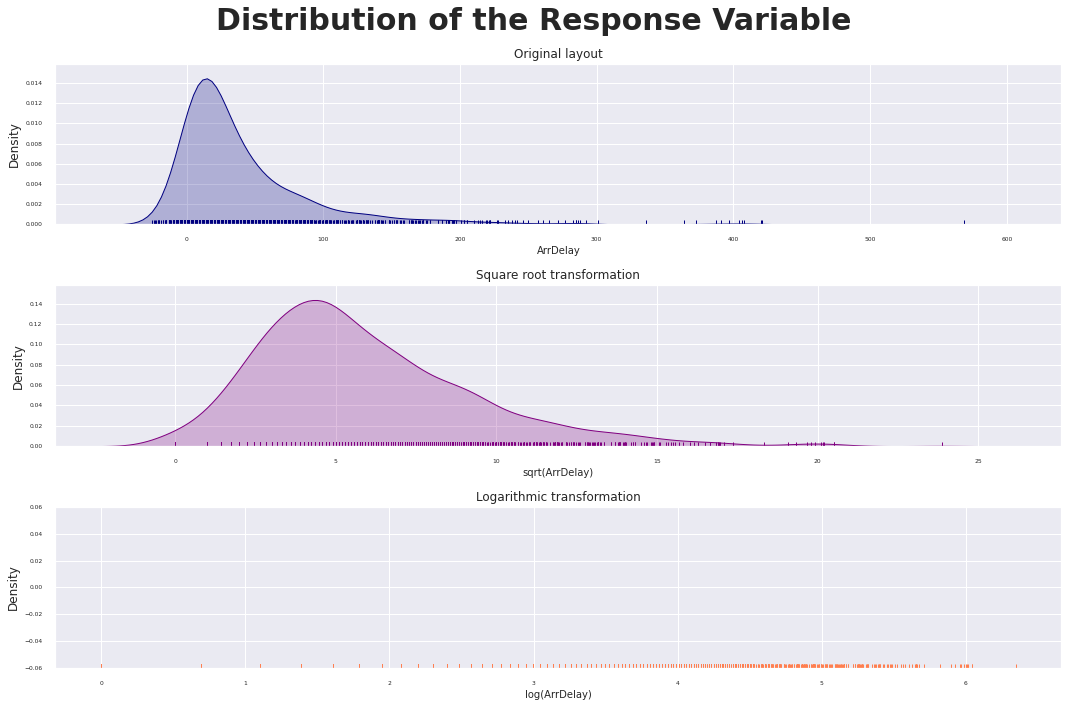

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Response Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png");

## Numerical variables

In [17]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

ID     Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count     1937.000  1937.000    1937.000   1937.000  1937.000    1937.000   
mean   3383679.770     6.188      15.640      3.979  1525.730    1472.327   
std    2091877.698     3.527       8.625      1.955   446.757     421.887   
min       1682.000     1.000       1.000      1.000     6.000      10.000   
25%    1491121.000     3.000       8.000      2.000  1216.000    1145.000   
50%    3304630.000     6.000      16.000      4.000  1550.000    1511.000   
75%    5168977.000     9.000      23.000      5.000  1854.000    1820.000   
max    7008745.000    12.000      31.000      7.000  2356.000    2359.000   

        ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  \
count  1931.000    1937.000           1931.000        1937.000  1931.000   
mean   1619.845    1642.602            130.875         132.051   106.202   
std     549.547     463.585             70.310          69.969    67.079   
min       2.000       1.000             32.000          30.000    14.000   
25%    1334.000    1345.000             78.000          80.000    56.000   
50%    1730.000    1715.000            113.000         115.000    88.000   
75%    2029.500    2010.000            161.000         161.000   134.000   
max    2359.000    2359.000            441.000         419.000   370.000   

       ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  CarrierDelay  \
count  1931.000  1937.000  1937.000  1931.000  1936.000      1269.000   
mean     42.474    43.697   749.702     6.686    18.019        18.381   
std      56.640    53.677   569.053     4.470    13.466        42.627   
min     -25.000     6.000    45.000     1.000     1.000         0.000   
25%       9.000    12.000   334.000     4.000    10.000         0.000   
50%      24.000    24.000   594.000     6.000    14.000         1.000   
75%      55.000    53.000   984.000     8.000    21.000        19.000   
max     569.000   571.000  3329.000    44.000   137.000       569.000   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
count      1269.000  1269.000       1269.000           1269.000  
mean          4.009    15.340          0.043             24.800  
std          20.647    36.476          0.923             42.243  
min           0.000     0.000          0.000              0.000  
25%           0.000     0.000          0.000              0.000  
50%           0.000     2.000          0.000              6.000  
75%           0.000    14.000          0.000             33.000  
max         285.000   421.000         25.000            387.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

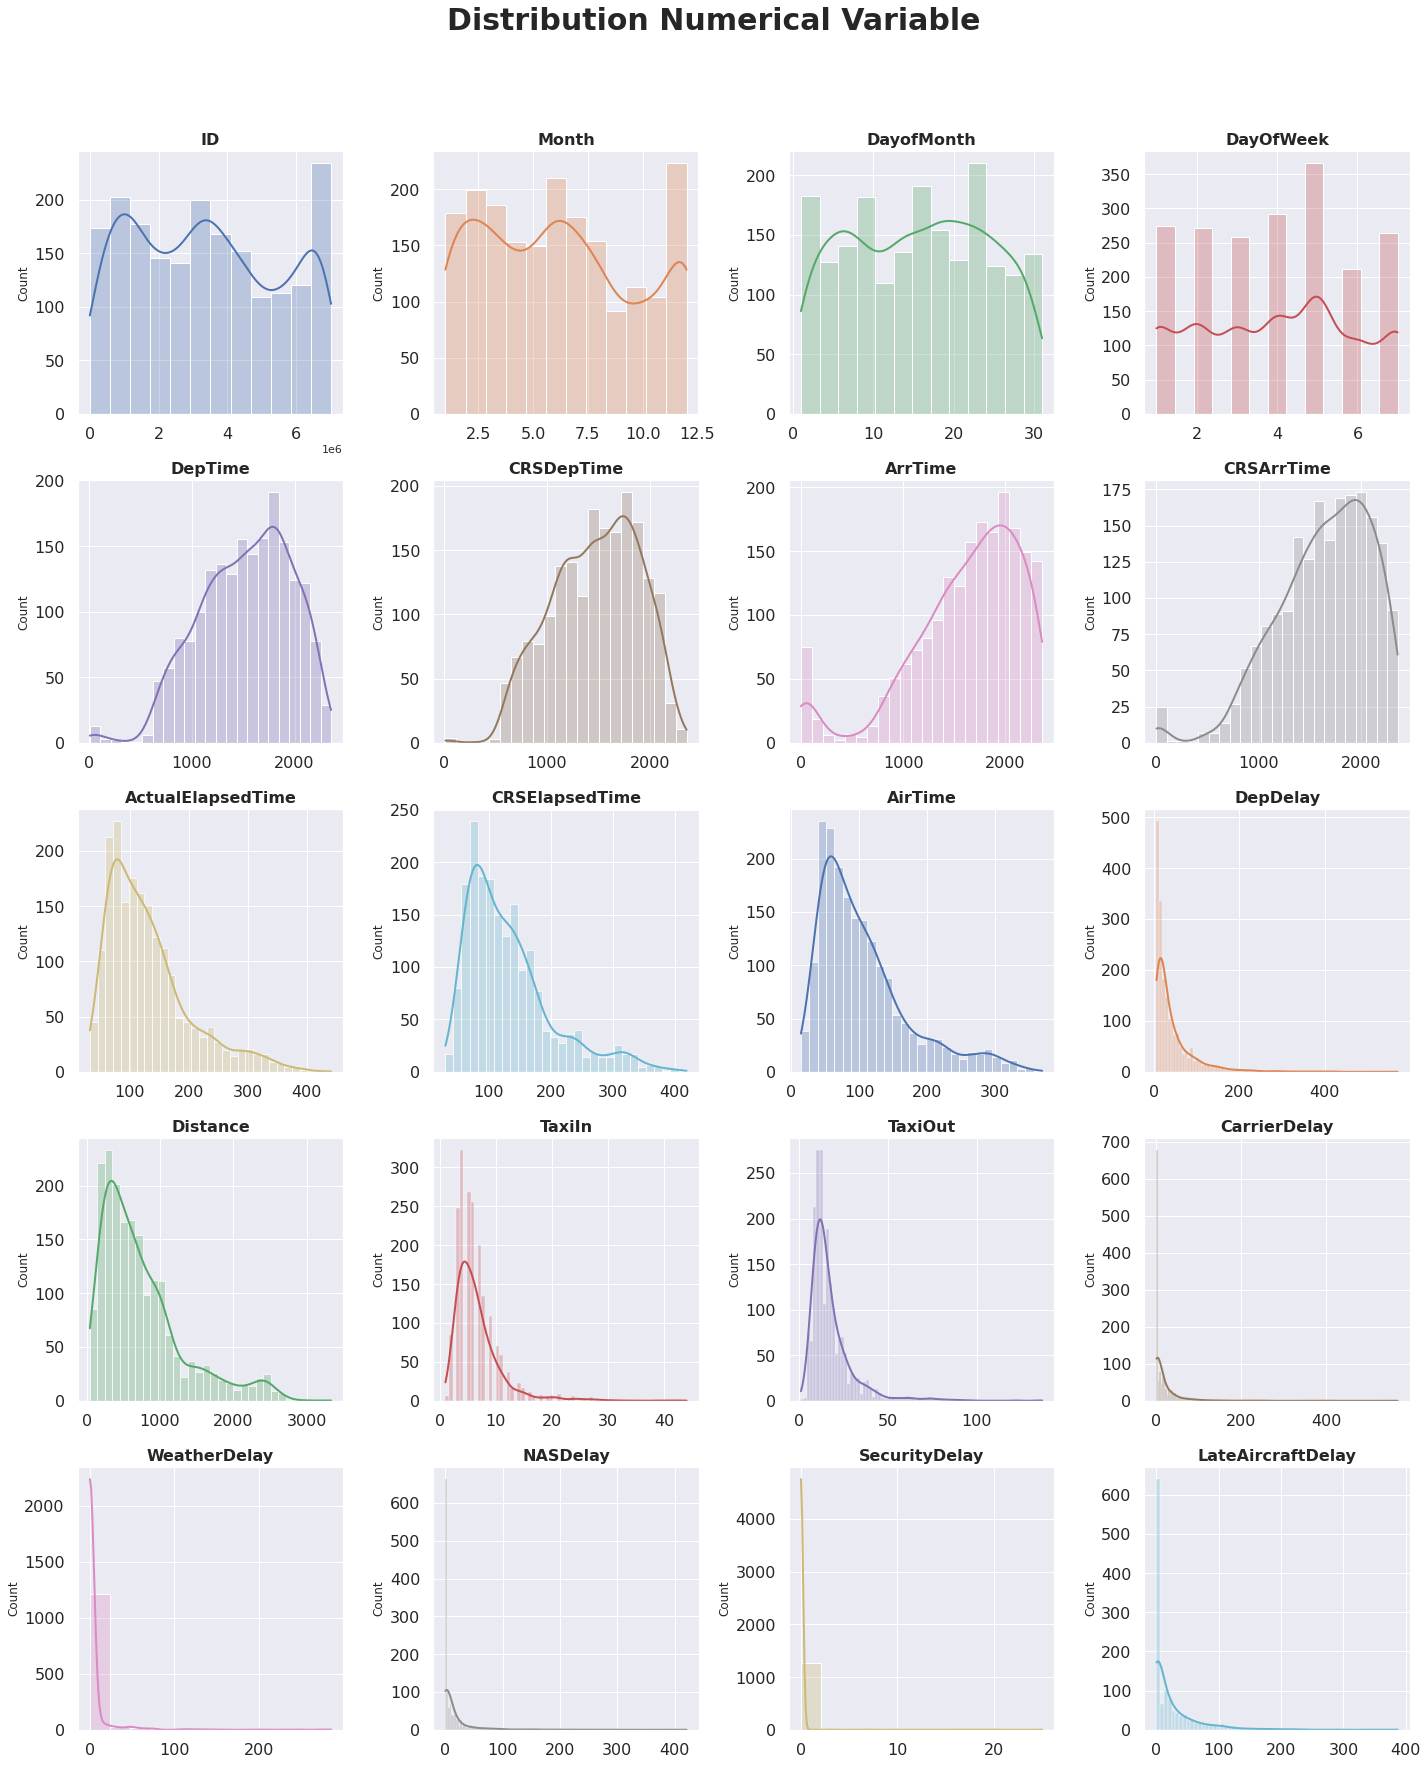

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

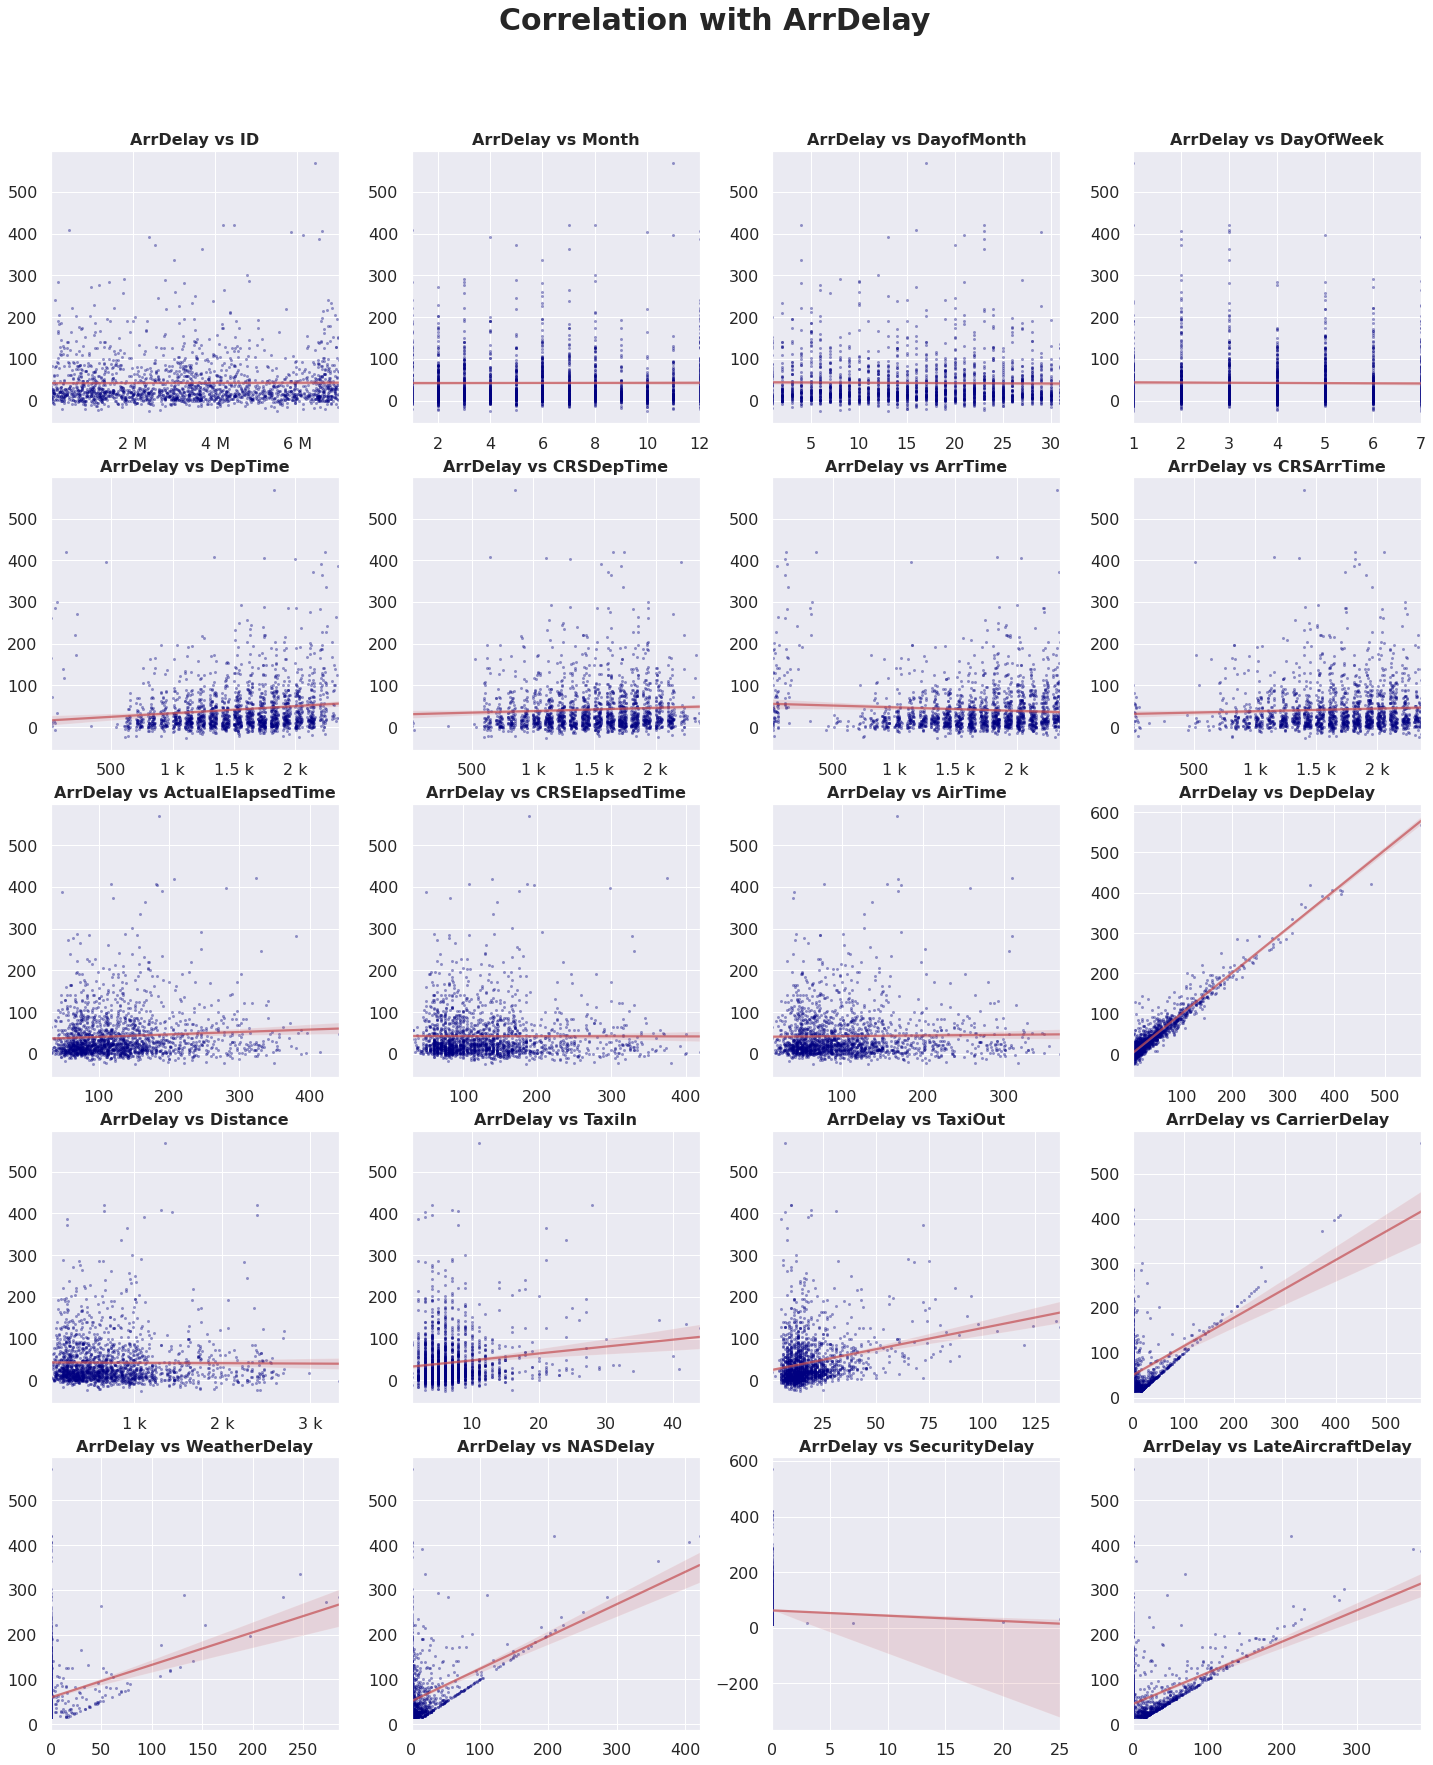

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=4, nrows=5,  figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png");

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [20]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

<IPython.core.display.Javascript object>

variable_1         variable_2         r     abs_r
1                   ID              Month  0.996163  0.996163
21               Month                 ID  0.996163  0.996163
219            AirTime     CRSElapsedTime  0.986852  0.986852
199     CRSElapsedTime            AirTime  0.986852  0.986852
283           Distance            AirTime  0.981996  0.981996
223            AirTime           Distance  0.981996  0.981996
282           Distance     CRSElapsedTime  0.981914  0.981914
202     CRSElapsedTime           Distance  0.981914  0.981914
178  ActualElapsedTime            AirTime  0.978930  0.978930
218            AirTime  ActualElapsedTime  0.978930  0.978930
197     CRSElapsedTime  ActualElapsedTime  0.974316  0.974316
177  ActualElapsedTime     CRSElapsedTime  0.974316  0.974316
263           DepDelay           ArrDelay  0.959996  0.959996
243           ArrDelay           DepDelay  0.959996  0.959996
281           Distance  ActualElapsedTime  0.957600  0.957600
181  ActualElapsedTime           Distance  0.957600  0.957600
89             DepTime         CRSDepTime  0.889127  0.889127
109         CRSDepTime            DepTime  0.889127  0.889127
152         CRSArrTime         CRSDepTime  0.699675  0.699675
112         CRSDepTime         CRSArrTime  0.699675  0.699675

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

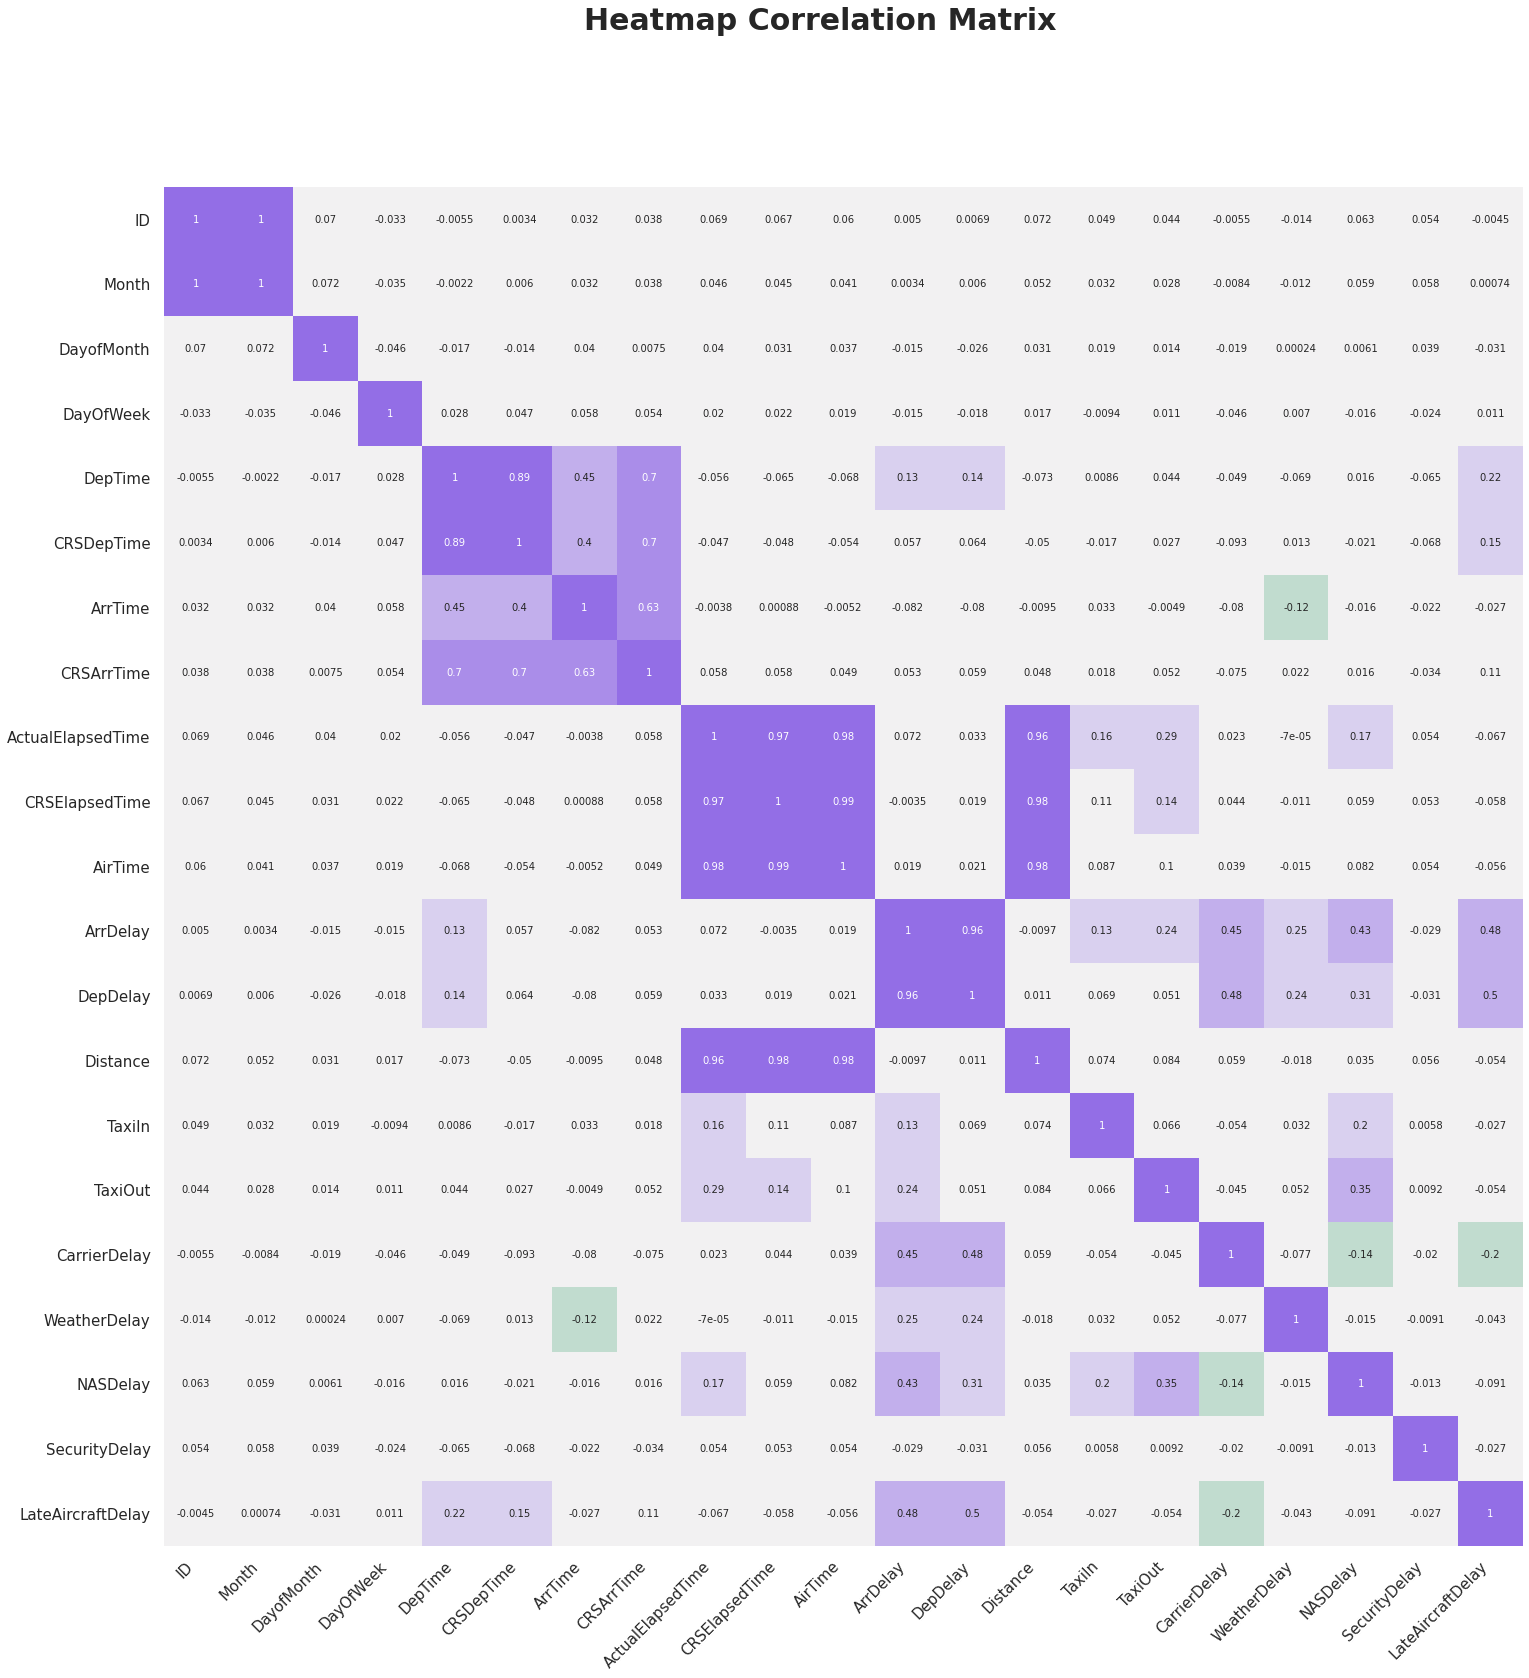

In [21]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png");

## Qualitative variables

In [22]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

UniqueCarrier TailNum Origin  Dest
count           1937    1937   1937  1937
unique            20    1559    180   186
top               WN  N776WN    ATL   ATL
freq             388       6    130   102

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

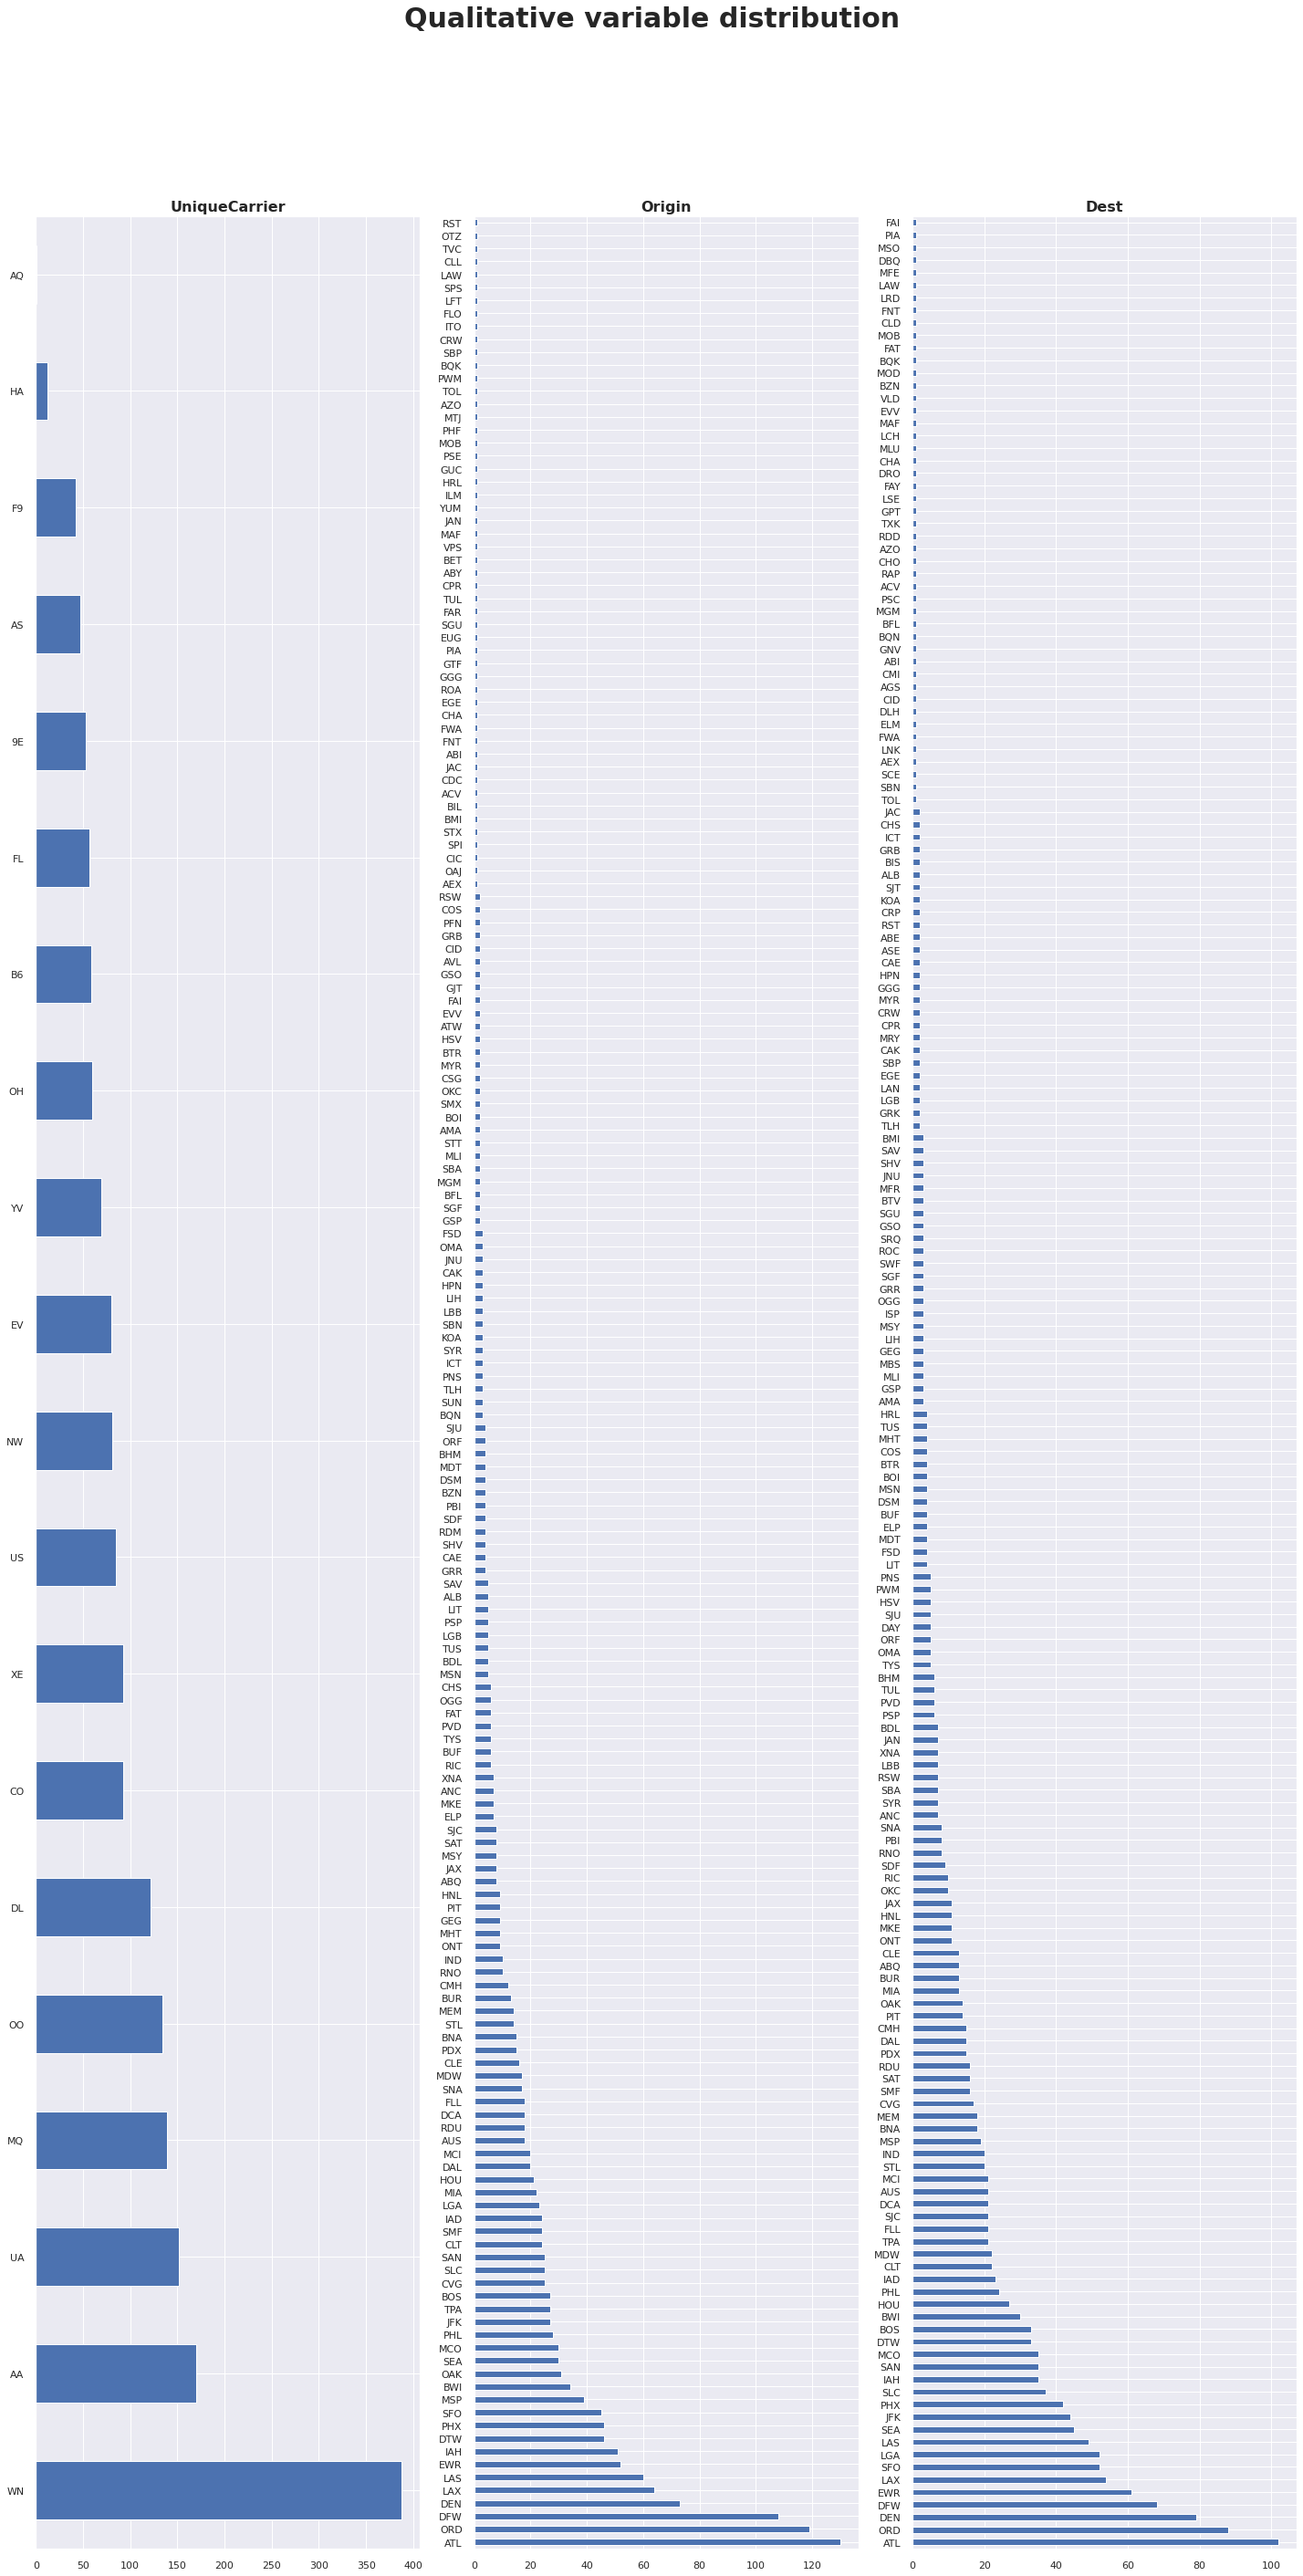

In [23]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

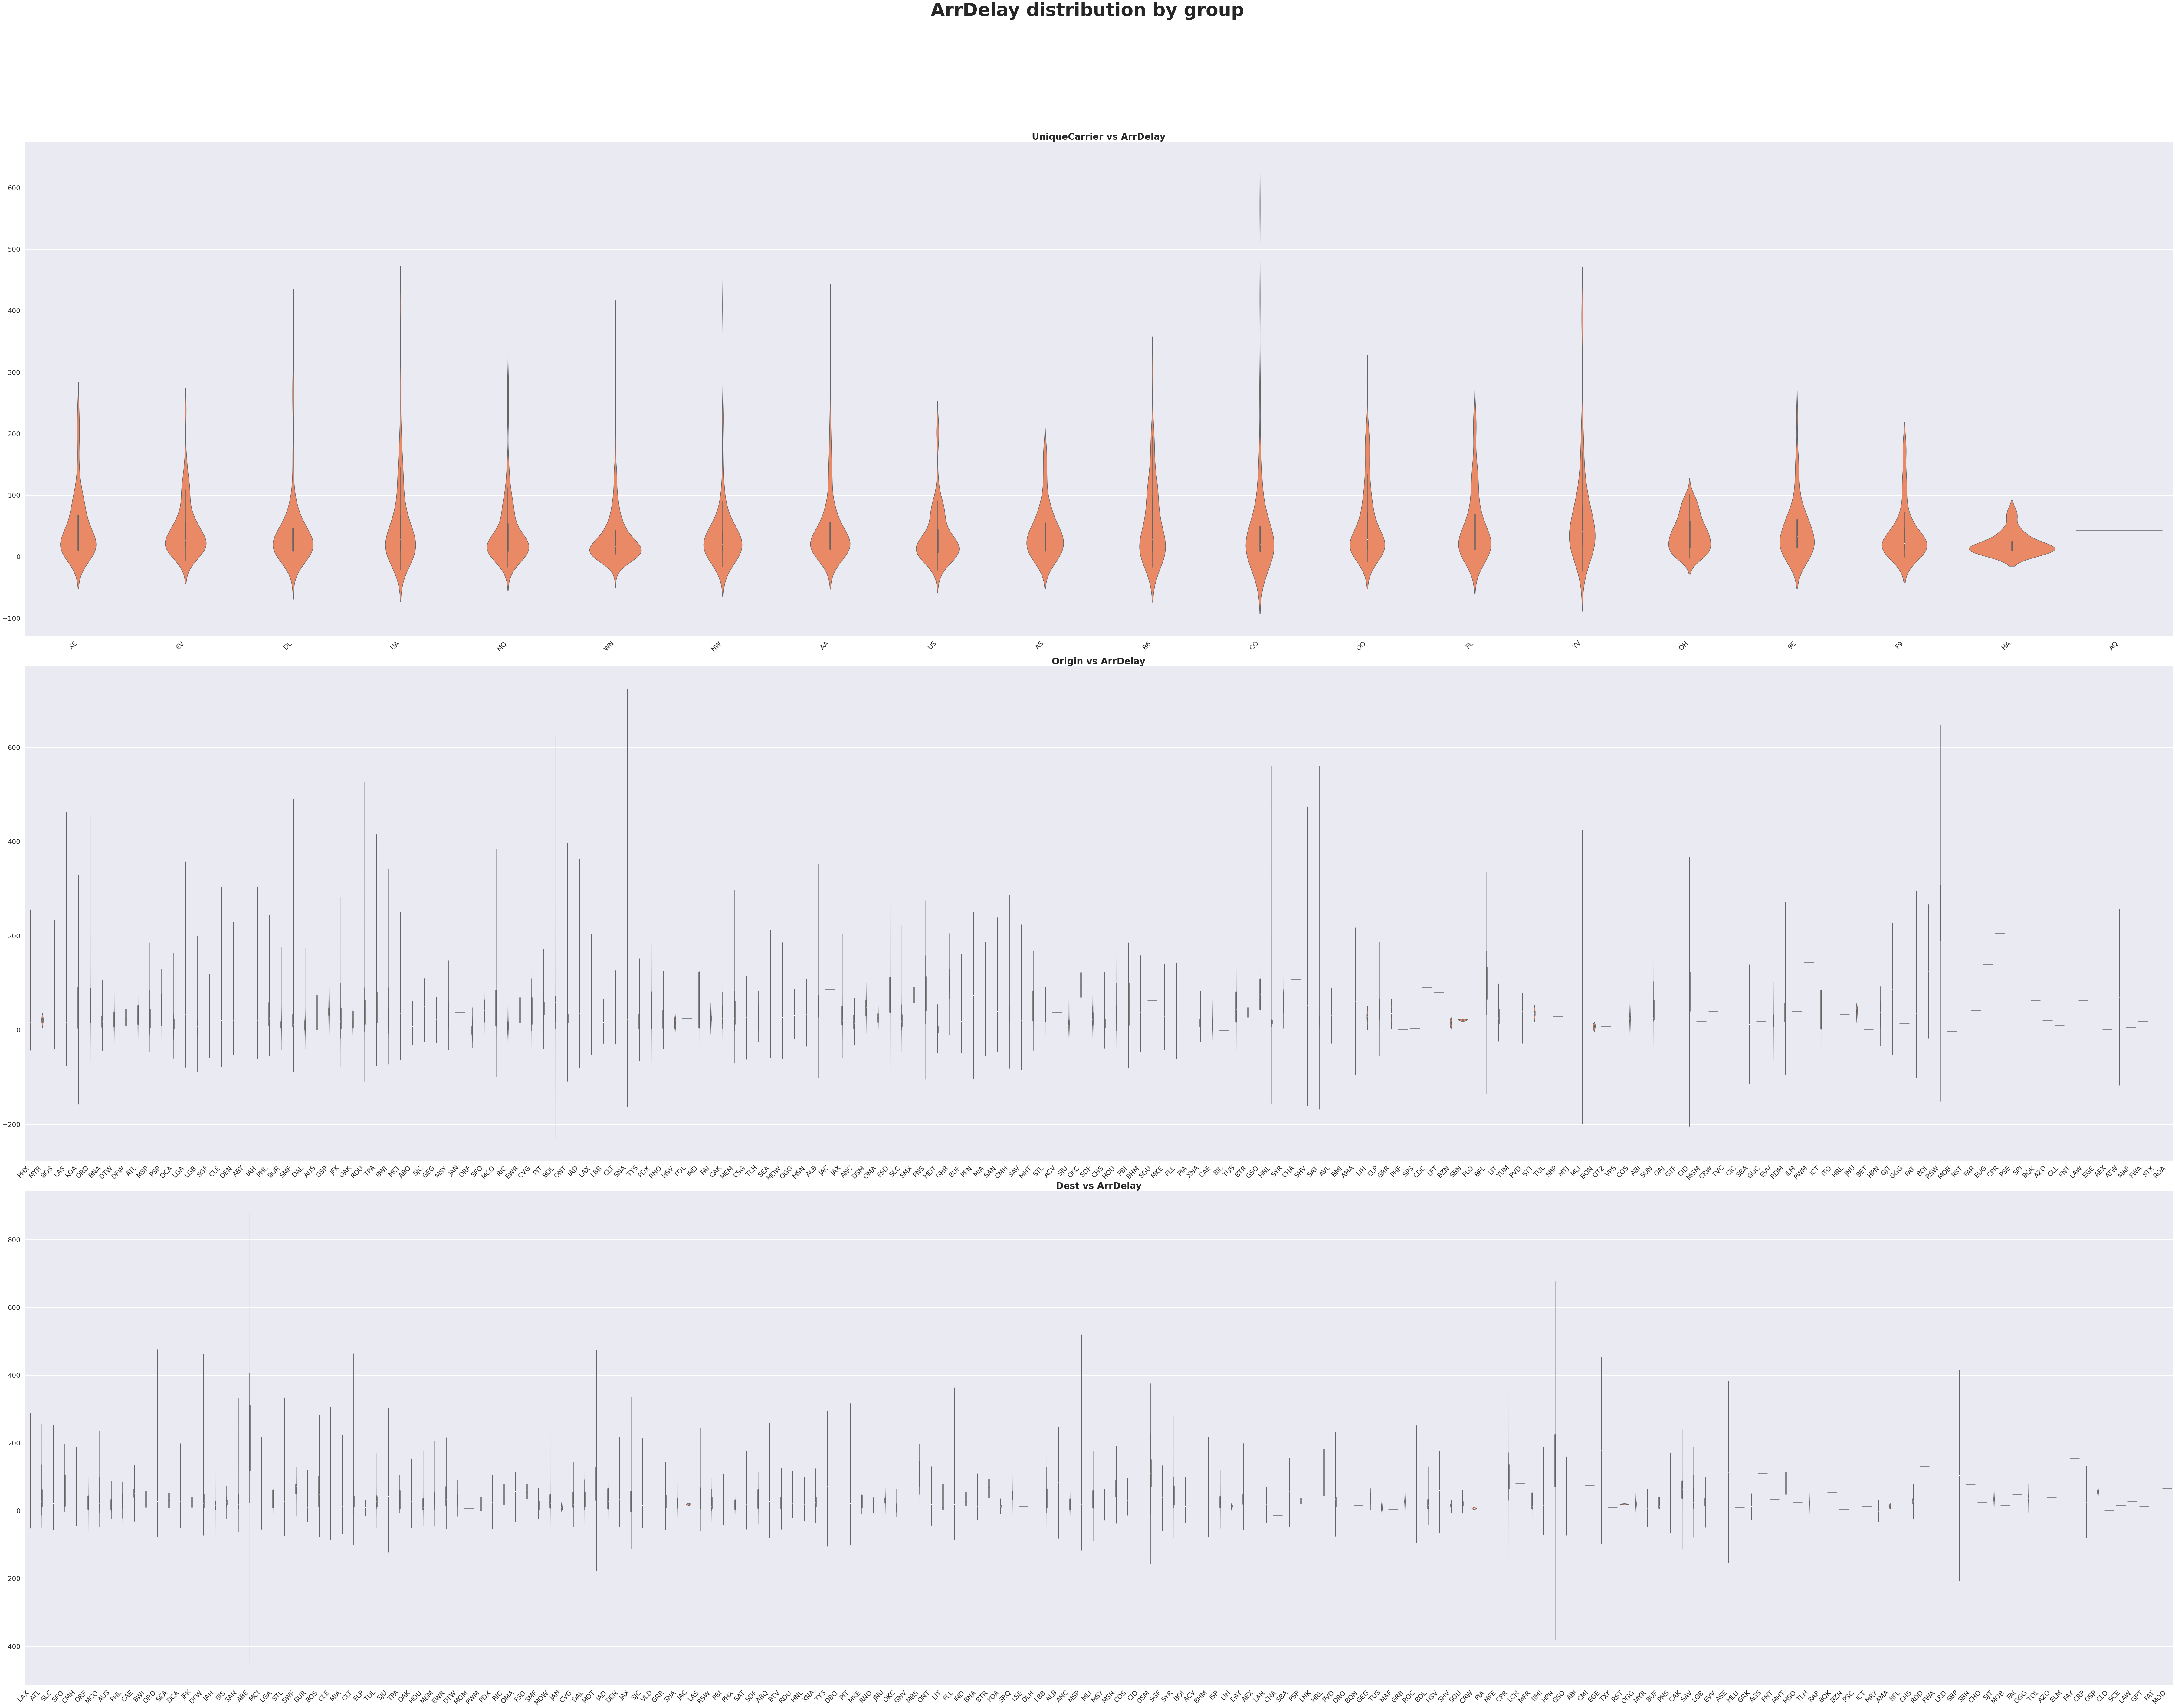

In [24]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100, 80))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "coral",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 30, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 22)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45, horizontalalignment = 'right')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 60, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png");

### Graph Pie chart's for each qualitative variables

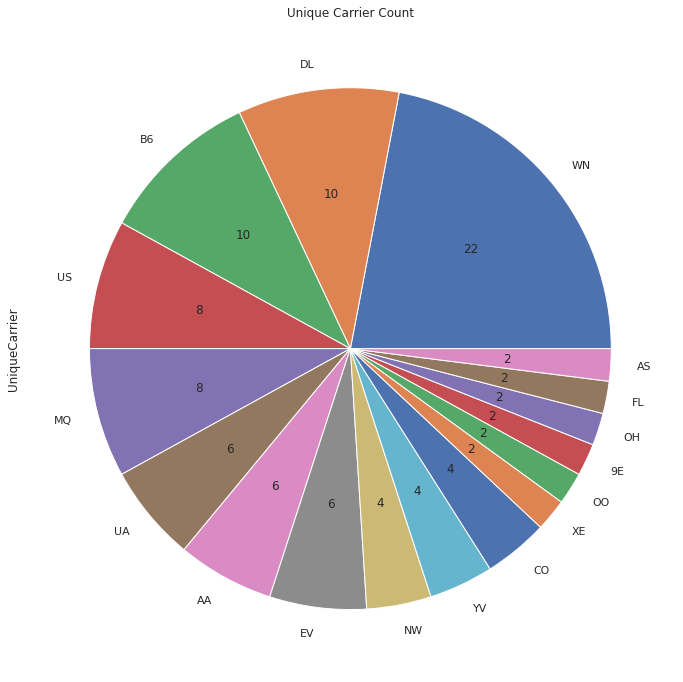

In [25]:
# Pie chart de UniqueCarrier
plot = df['UniqueCarrier'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Unique Carrier Count')

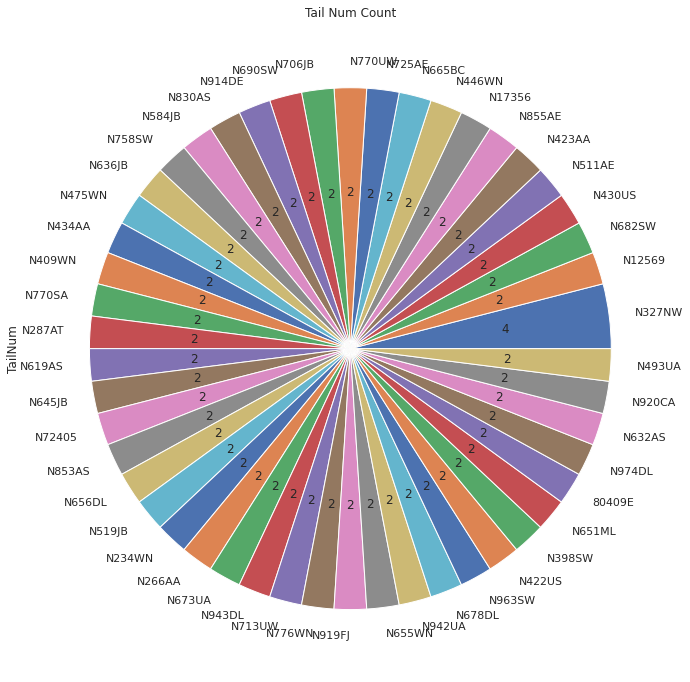

In [26]:
# Pie chart de TailNum
plot = df['TailNum'].head(50).value_counts().plot(kind='pie', autopct='%.0f',figsize=(12, 12),title='Tail Num Count')

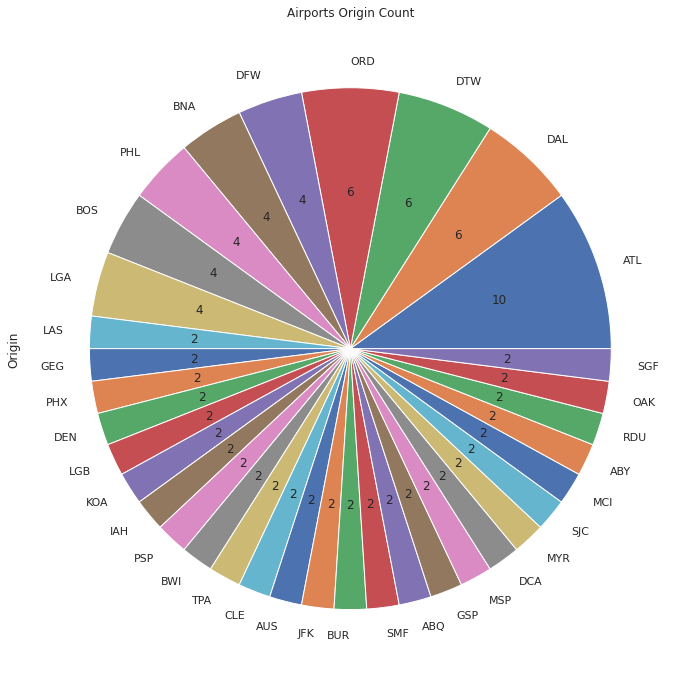

In [27]:
# Pie chart de Origin
plot = df['Origin'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Origin Count')

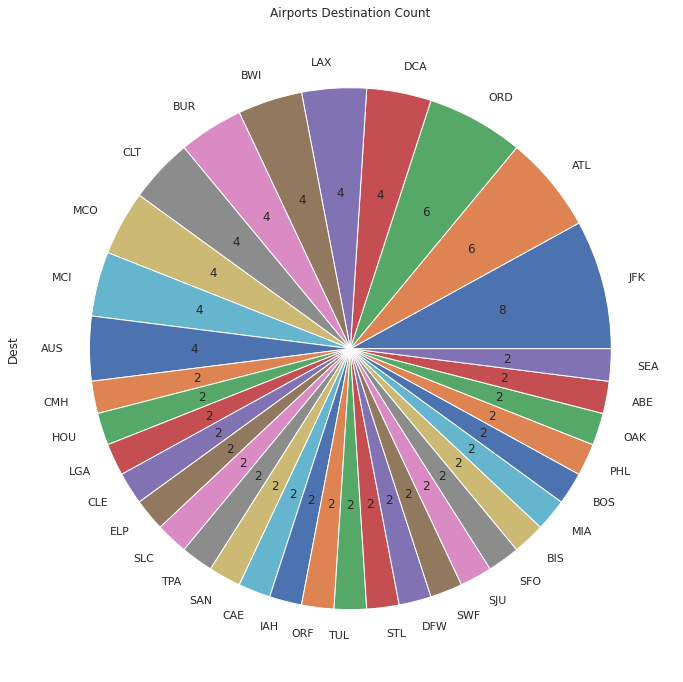

In [28]:
# Pie chart de Dest
plot = df['Dest'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Destination Count')

## Remove duplicates

In [29]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [30]:
# Frecuency encoding

labels = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

for category in labels: 
    
    cat_map = df.groupby(category).size() / len(df)*100
    
    df[category] = df[category].map(cat_map)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   float64
 9   TailNum            1937 non-null   float64
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   float64
 16  Dest              

## Imputation of missing values

In [32]:
df.isnull().sum().sum()

3371

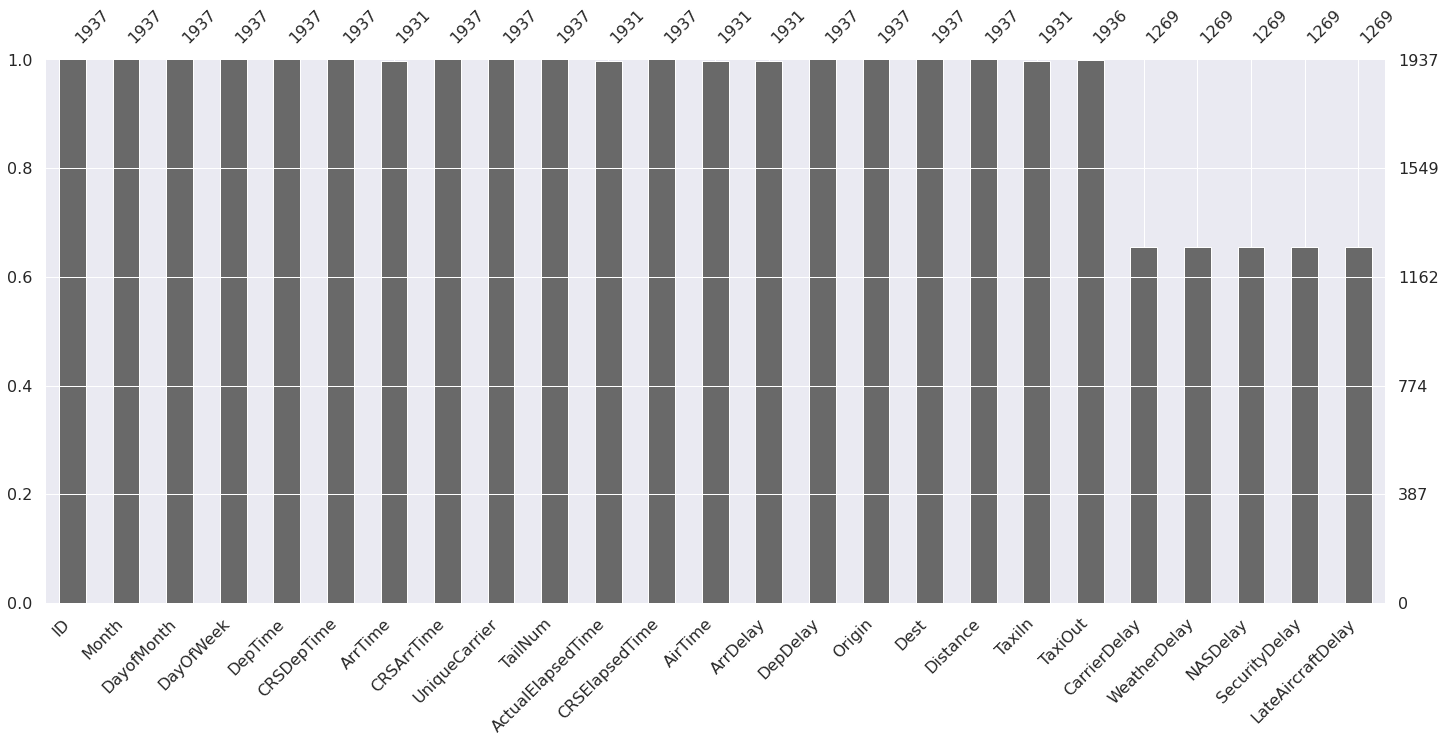

In [33]:
# Missing Values
msno.bar(df);

In [34]:
# Script created for transform missing data
# ===============================================================================
import missing

In [35]:
df[:] = missing.transform(df[:])

In [36]:
df.isnull().sum().sum()

0

In [37]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
df.isna().any()

ID                   False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [39]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************
*****************************************************************************

# Exercise 1: 
  - Classify the different flights using the K-means algorithm.

# Principal Compnets Analysis

In [40]:
df = pd.read_csv(path + "processed/DelayedFlightsProcessed.csv")

<IPython.core.display.Javascript object>

In [41]:
# Choose features
data_for_clustering = df.values[:,1:]
data_for_clustering = np.nan_to_num(data_for_clustering)

data_for_clustering

<IPython.core.display.Javascript object>

array([[ 1.,  1.,  2., ...,  0.,  0., 81.],
       [ 3., 20.,  4., ..., 18.,  0.,  0.],
       [ 5.,  5.,  1., ..., 20.,  0.,  0.],
       ...,
       [ 1., 18.,  5., ..., 15.,  0.,  0.],
       [ 1.,  9.,  3., ...,  0.,  0., 37.],
       [ 4., 12.,  6., ..., 12.,  0., 50.]])

In [42]:
# Create data matrix
data_matrix = np.matrix(data_for_clustering).astype(float)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data_matrix)

<IPython.core.display.Javascript object>

In [43]:
pca = PCA(n_components= 10)
principalComponents = pca.fit_transform(data_for_clustering)

<IPython.core.display.Javascript object>

In [44]:
print(pca.explained_variance_ratio_.round(3))

[0.508 0.273 0.147 0.046 0.017 0.005 0.001 0.001 0.    0.   ]


## Plot the variations for each PC

In [45]:
# Label to color dict (automatic)
label_color_dict = {label:idx for idx,label in enumerate(np.unique(labels))}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

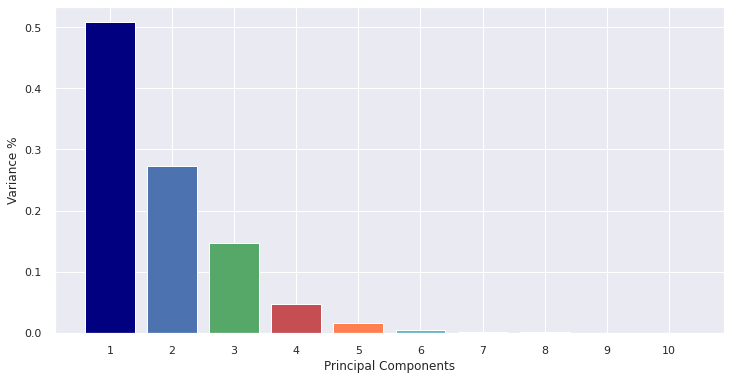

In [46]:
PC = range(1, pca.n_components_+1)
plt.figure(figsize=(12,6))
plt.bar(PC, pca.explained_variance_ratio_, color=('navy','b','g','r','coral','c','m','y','k','gray'))
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);
plt.savefig("../reports/figures/Principal_Components.png");

## Create a dataframe of the components

In [47]:
PCA_components = pd.DataFrame(data= principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])
PCA_components.head().round(3)

<IPython.core.display.Javascript object>

PC 1      PC 2     PC 3     PC 4     PC 5     PC 6    PC 7     PC 8  \
0   466.419  -415.400  -39.357  134.649  -87.182   53.905 -42.901  -44.019   
1  -523.523  -404.861  -74.537  -33.841   54.827  -30.100  -0.113   47.823   
2  1459.539  1370.667 -181.584  -24.282  -52.674  -37.362 -19.906   35.520   
3  -202.848  -518.080  -40.025  -10.710    6.569  -34.908  -1.828   -7.158   
4  -420.034  1704.779 -524.782  -44.644 -207.243  183.650 -99.375 -108.356   

     PC 9  PC 10  
0   2.476  1.172  
1 -53.373  0.556  
2 -39.657  5.969  
3   3.098  8.421  
4  15.634 -9.767

# Clustering with K-Means

### Finding the optimal number of clusters

In [48]:
# Best K
# ==============================================================================

def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters= k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

# Best K Parallel
# ==============================================================================

def chooseBestKforKMeansParallel(scaled_data, k_range):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k_range: list of integers
        k range for applying KMeans
    Returns 
    -------
    best_k: int
        chosen value of k out of the given k range.
        chosen k is k with the minimum scaled inertia value.
    results: pandas DataFrame
        adjusted inertia value for each k in k_range
    '''
    
    ans = Parallel(n_jobs=-1,verbose=10)(delayed(kMeansRes)(scaled_data, k) for k in k_range)
    ans = list(zip(k_range,ans))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

# Best K Non Parallel
# ==============================================================================

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

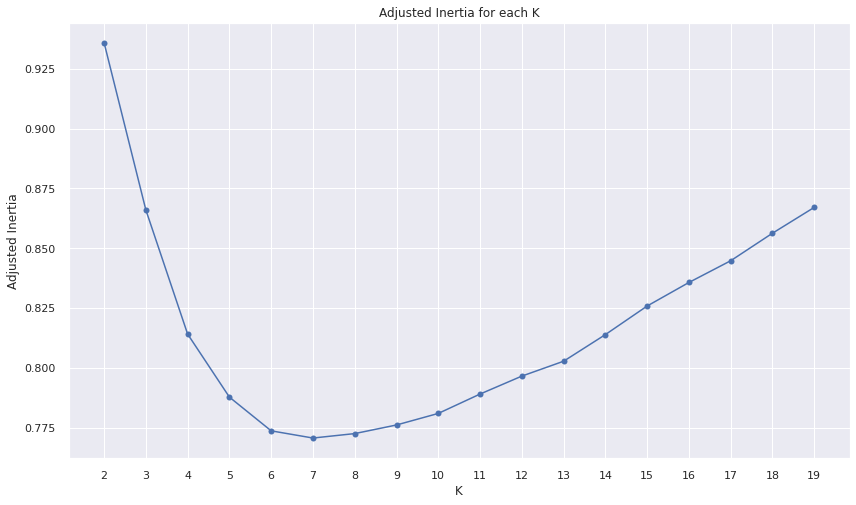

In [49]:
# Choose k range
k_range=range(2,20)

# Compute adjusted intertia
best_k, results = chooseBestKforKMeans(scaled_data, k_range)

results, best_k
# plot the results
plt.figure(figsize=(14,8))
plt.plot(results,'-o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))
plt.savefig("../reports/figures/BestK_for_KMeans.png");

In [50]:
results

Scaled Inertia
k                 
2         0.935898
3         0.866021
4         0.814152
5         0.787826
6         0.773737
7         0.770732
8         0.772586
9         0.776187
10        0.781012
11        0.789107
12        0.796602
13        0.802819
14        0.813943
15        0.825890
16        0.835725
17        0.844802
18        0.856304
19        0.867102

In [51]:
print(r'Select %s clusters as best to execute Kmeans Model' %best_k)

Select 7 clusters as best to execute Kmeans Model


## Execute the Kmeans model with 7 Clusters and adjust it to the Components of the PCA

In [52]:
k_means_pca = KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state= 6858).fit(PCA_components)

<IPython.core.display.Javascript object>

## Verify the labels of the Clustering

In [53]:
labels_pca = k_means_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create the graph of the Components

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

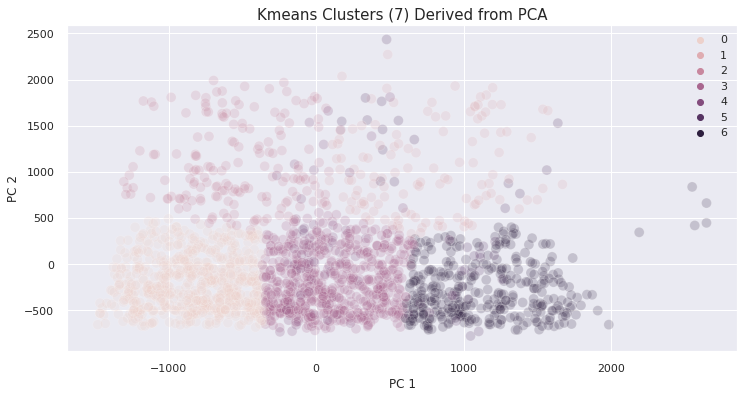

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(12,6))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, s=100,
               alpha=0.2).set_title('Kmeans Clusters (7) Derived from PCA',
               fontsize=15)
                                   
plt.legend()
plt.show()
plt.savefig("../reports/figures/Kmeans Clusters__Derived_from_PCA.png");

## Insert the Components in the Dataframe

In [55]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), PCA_components], axis=1)

df_pca_kmeans.head()

<IPython.core.display.Javascript object>

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

          PC 1         PC 2        PC 3        PC 4        PC 5        PC 6  \
0   466.419289  -415.399646  -39.356893  134.649349  -87.181874   53.904575   
1  -523.522600  -404.861482  -74.536857  -33.841121   54.827191  -30.100088   
2  1459.539018  1370.667238 -181.584072  -24.282052  -52.673751  -37.362012   
3  -202.848225  -518.079918  -40.025446  -10.710267    6.568661  -34.908206   
4  -420.034300  1704.779232 -524.782081  -44.643981 -207.243495  183.649618   

        PC 7        PC 8       PC 9     PC 10  
0 -42.900505  -44.018649   2.475975  1.171664  
1  -0.112881   47.822912 -53.373227  0.556085  
2 -19.905503   35.520377 -39.656835  5.969360  
3  -1.828175   -7.157681   3.098262  8.421375  
4 -99.374604 -108.356473  15.633939 -9.766605

## Add the labels of the clustering

In [56]:
df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head(10)

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   
5  2799351.0    5.0         5.0        1.0   1547.0      1525.0   1800.0   
6  6549953.0   12.0        30.0        2.0   1952.0      1940.0   2219.0   
7  2214245.0    4.0        27.0        7.0   1221.0      1214.0   1457.0   
8  6939849.0   12.0        24.0        3.0   1845.0      1835.0   1941.0   
9  4502777.0    8.0         7.0        4.0   1356.0      1350.0   1712.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   
5      1740.0       7.176045  0.051626               73.0            75.0   
6      2235.0      20.030976  0.154879               87.0           115.0   
7      1440.0       4.181724  0.206505              156.0           146.0   
8      1935.0       8.776458  0.051626               56.0            60.0   
9      1656.0       4.388229  0.051626              136.0           126.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   
5     45.0      20.0      22.0  6.143521  0.774393     296.0     4.0     24.0   
6     75.0     -16.0      12.0  0.774393  0.258131     585.0     4.0      8.0   
7    129.0      17.0       7.0  2.374806  1.806918     957.0     5.0     22.0   
8     37.0       6.0      10.0  5.575632  1.084151     190.0     3.0     16.0   
9     97.0      16.0       6.0  6.143521  1.239029     678.0     5.0     34.0   

   CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  LateAircraftDelay  \
0      0.000000      0.000000   0.000000       0.000000          81.000000   
1      8.000000      0.000000  18.000000       0.000000           0.000000   
2      0.000000      0.000000  20.000000       0.000000           0.000000   
3      0.000000      0.000000   0.000000       0.000000          16.000000   
4      0.000000      0.000000   0.000000       0.000000         173.000000   
5      5.000000      0.000000   0.000000       0.000000          15.000000   
6     18.381403      4.008668  15.340426       0.043341          24.799842   
7      7.000000      0.000000  10.000000       0.000000           0.000000   
8     18.381403      4.008668  15.340426       0.043341          24.799842   
9      0.000000      0.000000  16.000000       0.000000           0.000000   

          PC 1         PC 2        PC 3        PC 4        PC 5        PC 6  \
0   466.419289  -415.399646  -39.356893  134.649349  -87.181874   53.904575   
1  -523.522600  -404.861482  -74.536857  -33.841121   54.827191  -30.100088   
2  1459.539018  1370.667238 -181.584072  -24.282052  -52.673751  -37.362012   
3  -202.848225  -518.079918  -40.025446  -10.710267    6.568661  -34.908206   
4  -420.034300  1704.779232 -524.782081  -44.643981 -207.243495  183.649618   
5  -196.425186  -448.047828 -138.522152  -43.934743   37.001010  -27.951227   
6 -1053.443104  -128.

## Check Clusters

In [57]:
df_cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
df_cluster_0.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1   1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
6   6549953.0   12.0        30.0        2.0   1952.0      1940.0   2219.0   
8   6939849.0   12.0        24.0        3.0   1845.0      1835.0   1941.0   
10  1172690.0    2.0        12.0        2.0   2035.0      2011.0   2142.0   
12  3420935.0    6.0        24.0        2.0   2128.0      2115.0   2242.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
1       1906.0       4.130098  0.051626              129.0           111.0   
6       2235.0      20.030976  0.154879               87.0           115.0   
8       1935.0       8.776458  0.051626               56.0            60.0   
10      2114.0       6.298400  0.051626               67.0            63.0   
12      2228.0       4.181724  0.206505               74.0            73.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
1     100.0      26.0       8.0  0.103252  5.265875     317.0    12.0   
6      75.0     -16.0      12.0  0.774393  0.258131     585.0     4.0   
8      37.0       6.0      10.0  5.575632  1.084151     190.0     3.0   
10     32.0      28.0      24.0  6.711409  0.103252     191.0     7.0   
12     49.0      14.0      13.0  2.013423  4.543108     334.0    11.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
1      17.0      8.000000      0.000000  18.000000       0.000000   
6       8.0     18.381403      4.008668  15.340426       0.043341   
8      16.0     18.381403      4.008668  15.340426       0.043341   
10     28.0     24.000000      0.000000   4.000000       0.000000   
12     14.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay         PC 1        PC 2       PC 3       PC 4  \
1            0.000000  -523.522600 -404.861482 -74.536857 -33.841121   
6           24.799842 -1053.443104 -128.192690 -73.550105 -70.095128   
8           24.799842  -661.198870 -556.592374  14.709724   5.417542   
10           0.000000 -1033.933956 -544.539709  23.187156  24.388341   
12          24.799842 -1234.451007 -394.915065  44.343423  27.265813   

         PC 5       PC 6       PC 7       PC 8       PC 9     PC 10  \
1   54.827191 -30.100088  -0.112881  47.822912 -53.373227  0.556085   
6   64.619669 -56.071261   9.927932 -15.792996  21.922458 -9.236830   
8   64.003589 -41.864069   6.706619  -3.342467   6.740329 -8.905788   
10  63.386980 -23.048431  27.579428   9.360483  -3.835952  2.802420   
12  76.554366 -35.218526   9.158343  -2.840114   9.273768 -7.484244   

    Kmeans PCA  
1            0  
6            0  
8            0  
10           0  
12           0

In [58]:
df_cluster_0.describe()

ID       Month  DayofMonth   DayOfWeek      DepTime  \
count  6.010000e+02  601.000000  601.000000  601.000000   601.000000   
mean   3.401738e+06    6.262895   15.512479    4.109817  1926.457571   
std    2.108597e+06    3.547878    8.667387    1.917790   154.592460   
min    4.806000e+03    1.000000    1.000000    1.000000  1608.000000   
25%    1.454937e+06    3.000000    8.000000    3.000000  1813.000000   
50%    3.362422e+06    6.000000   16.000000    4.000000  1920.000000   
75%    5.036182e+06    9.000000   23.000000    5.000000  2035.000000   
max    7.007686e+06   12.000000   31.000000    7.000000  2308.000000   

        CRSDepTime      ArrTime   CRSArrTime  UniqueCarrier     TailNum  \
count   601.000000   601.000000   601.000000     601.000000  601.000000   
mean   1853.116473  2098.785099  2030.193012       8.702069    0.078943   
std     157.839263   155.343416   156.435213       6.422650    0.040854   
min    1455.000000  1619.844640  1615.000000       0.619515    0.051626   
25%    1730.000000  1958.000000  1918.000000       4.130098    0.051626   
50%    1835.000000  2110.000000  2020.000000       6.917914    0.051626   
75%    1955.000000  2229.000000  2142.000000       8.776458    0.103252   
max    2253.000000  2359.000000  2357.000000      20.030976    0.309757   

       ActualElapsedTime  CRSElapsedTime     AirTime    ArrDelay    DepDelay  \
count         601.000000      601.000000  601.000000  601.000000  601.000000   
mean          103.653702      105.296173   79.709155   42.889308   44.455907   
std            38.462431       36.823753   34.305459   48.831836   45.647875   
min            32.000000       32.000000   14.000000  -17.000000    6.000000   
25%            72.000000       75.000000   52.000000   11.000000   14.000000   
50%           102.000000      100.000000   76.000000   26.000000   27.000000   
75%           133.000000      135.000000  103.000000   59.000000   60.000000   
max           236.000000      210.000000  180.000000  373.000000  335.000000   

           Origin        Dest     Distance      TaxiIn     TaxiOut  \
count  601.000000  601.000000   601.000000  601.000000  601.000000   
mean     2.305485    1.754347   524.640599    6.804802   17.136439   
std      2.100407    1.542145   273.334893    5.382409   12.128535   
min      0.051626    0.051626    72.000000    1.000000    1.000000   
25%      0.774393    0.516262   301.000000    4.000000   10.000000   
50%      1.393908    1.135777   487.000000    5.000000   13.000000   
75%      3.304078    2.684564   723.000000    7.000000   20.000000   
max      6.711409    5.265875  1197.000000   44.000000   98.000000   

       CarrierDelay  WeatherDelay    NASDelay  SecurityDelay  \
count    601.000000    601.000000  601.000000     601.000000   
mean      15.432359      3.089277   13.638971       0.013774   
std       26.990910     10.638964   24.917592       0.020197   
min        0.000000      0.000000    0.000000       0.000000   
25%        0.000000      0.000000    0.000000       0.000000   
50%       13.000000      0.000000   11.000000       0.000000   
75%       18.381403      4.008668   15.340426       0.043341   
max      373.000000    118.000000  285.000000       0.043341   

       LateAircraftDelay         PC 1        PC 2        PC 3        PC 4  \
count         601.000000   601.000000  601.000000  601.000000  601.000000   
mean           28.979650  -832.810787 -204.237573  -37.790348   32.627499   
std            36.641398   288.321846  284.086220   71.132047   62.268734   
min             0.000000 -1482.643033 -685.076736 -263.133318 -120.115357   
25%             0.000000 -1059.972927 -435.726729  -87.712354   -2.142885   
50%            24.799842  -817.280246 -237.342437  -32.775328   24.388341   
75%            25.000000  -589.157045    0.783573   12.021118   66.242150   
max           277.000000  -351.827528  490.102142  320.304466  356.916844   

             PC 5        PC 6        PC 7        PC 8        PC 9    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ArrDelay', ylabel='Count'>

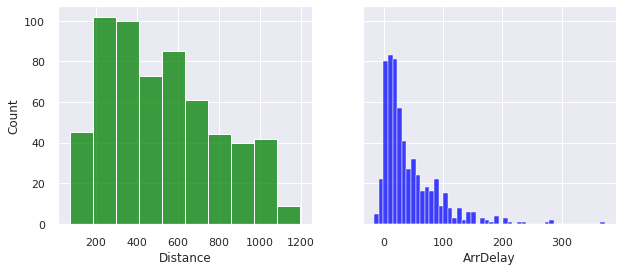

In [59]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="blue", ax=ax2, bins=50)


In [60]:
df_cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
df_cluster_1.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
2   2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
16  6420900.0   11.0        20.0        4.0   1059.0       850.0   1906.0   
28  3660939.0    7.0        20.0        7.0    651.0       645.0   1101.0   
56  1127848.0    2.0        19.0        2.0   1249.0      1225.0   1528.0   
87  4104725.0    7.0        18.0        5.0   1228.0      1215.0   1638.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
2       1011.0       6.298400  0.051626              328.0           321.0   
16      1704.0       3.045947  0.051626              307.0           314.0   
28      1100.0      20.030976  0.206505              190.0           195.0   
56      1540.0       3.045947  0.103252              159.0           195.0   
87      1640.0       8.776458  0.103252              190.0           205.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
2     302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0   
16    288.0     122.0     129.0  0.258131  2.271554    2465.0     9.0   
28    175.0       1.0       6.0  0.929272  1.548787    1342.0     6.0   
56    143.0     -12.0      24.0  1.548787  0.258131    1214.0     1.0   
87    174.0      -2.0      13.0  5.575632  1.239029    1302.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
2      18.0      0.000000      0.000000  20.000000       0.000000   
16     10.0     19.000000      0.000000   0.000000       0.000000   
28      9.0     18.381403      4.008668  15.340426       0.043341   
56     15.0     18.381403      4.008668  15.340426       0.043341   
87     11.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay         PC 1         PC 2        PC 3        PC 4  \
2            0.000000  1459.539018  1370.667238 -181.584072  -24.282052   
16         103.000000   374.625062  1791.433458 -573.789779 -144.809653   
28          24.799842  1377.828678   595.764370 -312.864318 -159.902526   
56          24.799842   363.583258   474.680004 -128.634579  -61.920226   
87          24.799842   269.945780   583.234586 -218.373254 -116.068831   

          PC 5        PC 6       PC 7       PC 8       PC 9     PC 10  \
2   -52.673751  -37.362012 -19.905503  35.520377 -39.656835  5.969360   
16 -166.585004  117.424447 -47.696197 -76.723563  19.888526 -2.981734   
28  -15.640224  -42.958237  -7.998772 -13.487210   8.427468 -8.907289   
56    8.407115  -46.211620   1.395774 -19.739478  21.971937 -6.029430   
87   13.071531  -42.466285  -3.015107  -8.034704   0.624341 -7.664161   

    Kmeans PCA  
2            1  
16           1  
28           1  
56           1  
87           1

In [61]:
df_cluster_1.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      123.000  123.000     123.000    123.000   123.000     123.000   
mean   3853918.894    6.862      15.602      4.130   988.642    1030.073   
std    1909349.030    3.235       7.727      2.012   266.519     325.009   
min      34806.000    1.000       1.000      1.000     6.000     535.000   
25%    2543152.000    5.000       9.000      2.500   849.500     830.000   
50%    3861360.000    7.000      16.000      4.000  1037.000    1020.000   
75%    5348021.000    9.000      21.000      6.000  1151.000    1130.500   
max    6990723.000   12.000      31.000      7.000  1535.000    2355.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   123.000     123.000        123.000  123.000            123.000   
mean   1429.926    1374.146          8.029    0.071            246.503   
std     300.452     295.713          5.241    0.035             59.697   
min     356.000     503.000          0.620    0.052            130.875   
25%    1215.500    1152.000          4.801    0.052            196.000   
50%    1447.000    1421.000          7.847    0.052            242.000   
75%    1634.500    1606.500          8.776    0.103            290.000   
max    1933.000    2055.000         20.031    0.207            383.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         123.000  123.000   123.000   123.000  123.000  123.000   
mean          252.366  221.928    41.963    45.398    2.546    2.148   
std            58.693   57.359    72.832    74.418    1.771    1.127   
min           160.000  106.202   -25.000     6.000    0.052    0.155   
25%           204.000  174.500     5.500    10.000    1.239    1.136   
50%           240.000  216.000    20.000    19.000    2.375    2.272   
75%           302.000  267.500    46.500    45.500    3.304    2.736   
max           398.000  356.000   421.000   472.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   123.000  123.000  123.000       123.000       123.000   123.000   
mean   1761.829    7.388   17.309        27.768         2.126    17.718   
std     463.096    4.030   11.199        55.850         3.976    41.909   
min    1076.000    1.000    6.000         0.000         0.000     0.000   
25%    1384.000    5.000   11.000         6.500         0.000     0.000   
50%    1660.000    7.000   13.000        18.381         0.000    15.340   
75%    2133.000    8.500   19.000        18.381         4.009    15.340   
max    2994.000   29.000   81.000       408.000        33.000   421.000   

       SecurityDelay  LateAircraftDelay      PC 1      PC 2     PC 3  \
count        123.000            123.000   123.000   123.000  123.000   
mean           0.221             19.348   734.624  1033.863 -214.032   
std            2.253             25.046   400.441   471.434  226.912   
min            0.000              0.000    89.344   327.716 -585.775   
25%            0.000              0.000   390.362   652.435 -348.740   
50%            0.000             24.800   686.787   921.004 -243.711   
75%            0.043             24.800  1077.226  1422.734 -112.642   
max           25.000            165.000  1671.359  2271.455  671.663   

           PC 4      PC 5     PC 6     PC 7     PC 8     PC 9    PC 10  \
count   123.000   123.000  123.000  123.000  123.000  123.000  123.000   
mean    -48.265    31.065   16.435    1.940   -3.869    2.930   -3.383   
std     182.038   324.539  128.382   50.498   41.108   35.117   12.241   
min   -1058.440  -520.561  -64.693 -100.532 -107.351  -66.392  -68.683   
25%    -156.836   -52.545  -39.082  -13.548  -21.833  -14.973   -7.681   
50%     -66.570   -16.745  -26.709   -5.372  -10.356    4.357   -3.800   
75%      40.163     0.738   11.239    3.523    8.489   19.490    4.209   
max     717.218  1664.015  744.201  312.535  282.911  199.997   24.418   

       Kmeans PCA  
cou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

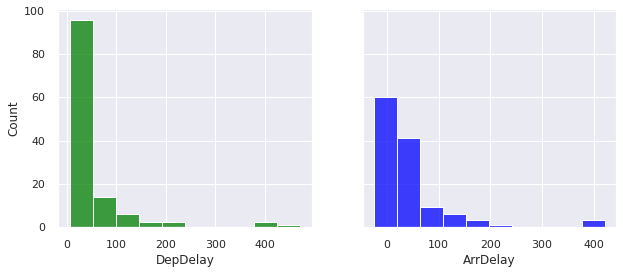

In [62]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_1, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_1, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [63]:
df_cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
df_cluster_2.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
4   5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   
23  4168982.0    7.0        10.0        4.0   1146.0      1135.0   2016.0   
33  6421333.0   11.0        21.0        5.0   1807.0      1759.0   2142.0   
45  5632059.0   10.0        12.0        7.0   1752.0      1745.0   2133.0   
46  2397628.0    5.0         6.0        2.0   1341.0      1335.0   1857.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
4       2029.0       7.847186  0.051626              296.0           299.0   
23      2006.0       3.045947  0.051626              330.0           331.0   
33      2139.0       3.045947  0.051626              395.0           400.0   
45      2143.0       4.388229  0.051626              221.0           238.0   
46      1855.0      20.030976  0.309757              196.0           200.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
4     280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0   
23    301.0      10.0      11.0  0.671141  2.271554    2465.0     8.0   
33    350.0       3.0       8.0  1.393908  0.671141    2465.0     2.0   
45    202.0     -10.0       7.0  1.445534  0.258131    1576.0     3.0   
46    179.0       2.0       6.0  0.413010  1.084151    1497.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
4      10.0      0.000000      0.000000   0.000000       0.000000   
23     21.0     18.381403      4.008668  15.340426       0.043341   
33     43.0     18.381403      4.008668  15.340426       0.043341   
45     16.0     18.381403      4.008668  15.340426       0.043341   
46     12.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay        PC 1         PC 2        PC 3        PC 4  \
4          173.000000 -420.034300  1704.779232 -524.782081  -44.643981   
23          24.799842  -10.776522  1814.975104 -490.778856 -268.400637   
33          24.799842 -748.521990  1803.308366  -24.089018   43.590154   
45          24.799842 -742.141034   884.699475 -110.939429  -57.448709   
46          24.799842  -62.583086   792.782565 -267.919824 -148.178453   

          PC 5        PC 6       PC 7        PC 8       PC 9     PC 10  \
4  -207.243495  183.649618 -99.374604 -108.356473  15.633939 -9.766605   
23   -5.077613  -30.828020  -7.458294  -10.259573   1.829035 -7.122429   
33   11.789771  -45.661115 -14.075638   36.910492 -82.428716 -7.844820   
45   47.368990  -53.427976   1.705904   -7.002262   1.538660 -9.000499   
46   23.183732  -43.816409   0.898717  -19.258826  25.317963 -8.854383   

    Kmeans PCA  
4            2  
23           2  
33           2  
45           2  
46           2

In [64]:
df_cluster_2.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      169.000  169.000     169.000    169.000   169.000     169.000   
mean   3503405.201    6.266      17.077      3.988  1670.645    1608.645   
std    1987880.163    3.344       8.580      1.829   232.253     245.772   
min      23227.000    1.000       1.000      1.000  1146.000     855.000   
25%    1769246.000    3.000      10.000      2.000  1508.000    1430.000   
50%    3308481.000    6.000      17.000      4.000  1703.000    1638.000   
75%    5039080.000    9.000      24.000      5.000  1832.000    1755.000   
max    6998338.000   12.000      31.000      7.000  2145.000    2130.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   169.000     169.000        169.000  169.000            169.000   
mean   2073.071    2016.710          7.828    0.069            253.787   
std     174.890     183.005          5.496    0.033             56.303   
min    1651.000    1403.000          0.052    0.052            143.000   
25%    1942.000    1907.000          4.388    0.052            213.000   
50%    2103.000    2030.000          6.298    0.052            239.000   
75%    2213.000    2146.000          8.776    0.103            296.000   
max    2355.000    2346.000         20.031    0.310            441.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         169.000  169.000   169.000   169.000  169.000  169.000   
mean          257.296  226.160    33.402    36.911    2.432    2.130   
std            54.034   51.933    53.704    52.474    1.795    1.180   
min           155.000  125.000   -23.000     6.000    0.052    0.052   
25%           218.000  188.000     8.000    14.000    1.291    1.136   
50%           242.000  215.000    23.000    21.000    1.755    2.272   
75%           300.000  268.000    47.000    45.000    3.098    2.788   
max           400.000  350.000   569.000   571.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   169.000  169.000  169.000       169.000       169.000   169.000   
mean   1768.142    6.746   20.882        17.939         3.098    14.604   
std     424.002    3.318   14.634        48.067         7.696    18.566   
min    1069.000    2.000    6.000         0.000         0.000     0.000   
25%    1444.000    5.000   12.000         0.000         0.000     0.000   
50%    1635.000    6.000   16.000        17.000         0.000    15.340   
75%    2153.000    8.000   25.000        18.381         4.009    15.340   
max    2640.000   27.000  120.000       569.000        52.000   100.000   

       SecurityDelay  LateAircraftDelay      PC 1      PC 2     PC 3     PC 4  \
count        169.000            169.000   169.000   169.000  169.000  169.000   
mean           0.034             19.974  -537.322  1075.369 -148.559  -14.861   
std            0.230             21.691   350.637   436.289  179.307  125.321   
min            0.000              0.000 -1305.854   368.297 -650.504 -268.401   
25%            0.000              0.000  -784.853   732.171 -294.303 -118.063   
50%            0.000             24.800  -557.311   946.745 -111.254   -2.757   
75%            0.043             24.800  -238.584  1465.618   11.325   82.223   
max            3.000            173.000    86.099  1989.761  152.017  427.025   

          PC 5     PC 6     PC 7     PC 8     PC 9    PC 10  Kmeans PCA  
count  169.000  169.000  169.000  169.000  169.000  169.000       169.0  
mean    -2.154   -8.688    0.473    1.168   -3.557    1.074         2.0  
std     73.266   71.350   41.426   32.369   29.781   11.730         0.0  
min   -716.460  -65.406  -99.375 -108.356 -110.116  -49.245         2.0  
25%    -16.259  -38.415  -11.601  -20.865  -21.897   -6.482         2.0  
50%     11.790  -27.490   -1.033   -1.422   -2.610    0.897         2.0  
75%     36.449    4.333    3.595   14.317   16.889    5.455         2.0  
max     70.114  7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

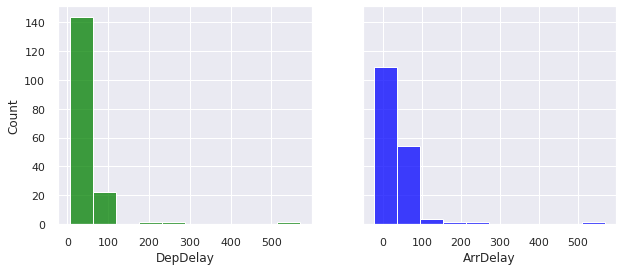

In [65]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_2, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_2, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [66]:
df_cluster_3 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 3]
df_cluster_3.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
5  2799351.0    5.0         5.0        1.0   1547.0      1525.0   1800.0   
7  2214245.0    4.0        27.0        7.0   1221.0      1214.0   1457.0   
9  4502777.0    8.0         7.0        4.0   1356.0      1350.0   1712.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
5      1740.0       7.176045  0.051626               73.0            75.0   
7      1440.0       4.181724  0.206505              156.0           146.0   
9      1656.0       4.388229  0.051626              136.0           126.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
5     45.0      20.0      22.0  6.143521  0.774393     296.0     4.0     24.0   
7    129.0      17.0       7.0  2.374806  1.806918     957.0     5.0     22.0   
9     97.0      16.0       6.0  6.143521  1.239029     678.0     5.0     34.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
3           0.0           0.0       0.0            0.0               16.0   
5           5.0           0.0       0.0            0.0               15.0   
7           7.0           0.0      10.0            0.0                0.0   
9           0.0           0.0      16.0            0.0                0.0   

         PC 1        PC 2        PC 3        PC 4       PC 5       PC 6  \
0  466.419289 -415.399646  -39.356893  134.649349 -87.181874  53.904575   
3 -202.848225 -518.079918  -40.025446  -10.710267   6.568661 -34.908206   
5 -196.425186 -448.047828 -138.522152  -43.934743  37.001010 -27.951227   
7  464.212025  206.911859 -111.029530  -31.700971  23.109868 -40.943477   
9   78.702325  -53.695353 -205.055759  -78.907044  34.927252 -39.017889   

        PC 7       PC 8       PC 9     PC 10  Kmeans PCA  
0 -42.900505 -44.018649   2.475975  1.171664           3  
3  -1.828175  -7.157681   3.098262  8.421375           3  
5   0.868956  -5.262468   0.051313  4.855536           3  
7   3.157827  10.206497   1.066983  4.054960           3  
9  -3.732460  24.169072 -10.209817  2.850365           3

In [67]:
df_cluster_3.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      583.000  583.000     583.000    583.000   583.000     583.000   
mean   3373336.568    6.177      15.938      4.009  1447.060    1379.307   
std    2105448.337    3.553       8.672      2.008   158.564     151.638   
min       1682.000    1.000       1.000      1.000  1025.000     911.000   
25%    1501779.500    3.000       8.000      2.000  1322.000    1245.000   
50%    3265478.000    6.000      16.000      4.000  1442.000    1405.000   
75%    5285000.000    9.000      23.000      6.000  1555.000    1506.000   
max    6991751.000   12.000      31.000      7.000  1925.000    1702.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   583.000     583.000        583.000  583.000            583.000   
mean   1630.099    1565.058          8.439    0.075            108.919   
std     158.251     150.021          6.213    0.036             41.677   
min    1314.000    1226.000          0.620    0.052             32.000   
25%    1508.000    1435.000          4.130    0.052             74.000   
50%    1630.000    1555.000          6.918    0.052            104.000   
75%    1748.500    1702.500          8.776    0.103            138.000   
max    2040.000    1930.000         20.031    0.310            270.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         583.000  583.000   583.000   583.000  583.000  583.000   
mean          109.010   84.574    40.418    41.132    2.251    1.886   
std            38.358   36.766    51.049    47.953    2.188    1.544   
min            30.000   17.000   -21.000     6.000    0.052    0.052   
25%            76.500   53.000     9.000    12.000    0.490    0.723   
50%           104.000   79.000    25.000    25.000    1.291    1.239   
75%           140.000  112.500    49.000    49.000    3.098    2.788   
max           206.000  202.000   406.000   396.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   583.000  583.000  583.000       583.000       583.000   583.000   
mean    557.425    6.574   17.828        17.035         3.344    17.125   
std     295.100    3.992   13.833        27.788        10.842    33.344   
min      45.000    1.000    4.000         0.000         0.000     0.000   
25%     297.500    4.000   10.000         0.000         0.000     0.000   
50%     515.000    6.000   14.000        18.381         0.000    15.340   
75%     781.000    8.000   20.000        18.381         4.009    15.340   
max    1300.000   34.000  137.000       253.000       132.000   406.000   

       SecurityDelay  LateAircraftDelay     PC 1     PC 2     PC 3     PC 4  \
count        583.000            583.000  583.000  583.000  583.000  583.000   
mean           0.015             23.328  108.572 -194.155  -99.290    3.450   
std            0.021             29.569  282.340  306.107   75.653   68.410   
min            0.000              0.000 -366.033 -720.405 -433.794 -175.241   
25%            0.000              0.000 -135.480 -463.385 -149.001  -37.421   
50%            0.000             24.800   82.403 -240.933  -84.544   -4.782   
75%            0.043             24.800  352.892   43.606  -46.909   35.181   
max            0.043            229.000  664.219  557.193  217.031  353.496   

          PC 5     PC 6     PC 7     PC 8     PC 9    PC 10  Kmeans PCA  
count  583.000  583.000  583.000  583.000  583.000  583.000       583.0  
mean    -8.160   -0.978   -1.096    2.305    0.416   -0.561         3.0  
std     62.003   65.155   31.910   36.070   21.490   14.207         0.0  
min   -444.238  -63.117 -137.880 -116.519  -88.606  -40.757         3.0  
25%    -22.173  -38.725  -11.700  -12.140  -10.047   -8.281         3.0  
50%     10.844  -25.970    0.086   -3.695    0.678   -1.113         3.0  
75%     30.720    7.465    5.242    7.091   11.093    4.438         3.0  
max     60.449  478.792  178.009  2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

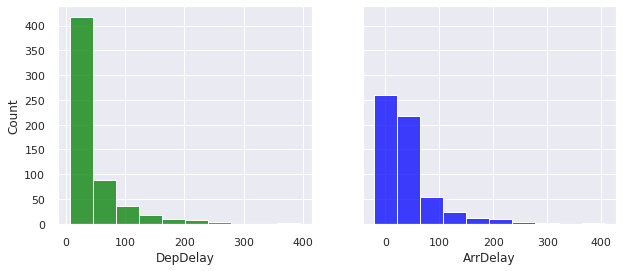

In [68]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_3, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_3, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [69]:
df_cluster_4 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 4]
df_cluster_4.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
40  6964828.0   12.0        20.0        6.0   2216.0      1855.0     55.0   
57  5955102.0   11.0         7.0        5.0   2209.0      2125.0     25.0   
62  5487462.0   10.0        21.0        2.0   2230.0      2105.0     43.0   
76  1320996.0    3.0        20.0        4.0   2255.0      2220.0     30.0   
80    96734.0    1.0        15.0        2.0   2257.0      1855.0    206.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
40      2139.0       3.045947  0.051626              159.0           164.0   
57      2345.0      20.030976  0.154879              136.0           140.0   
62      2352.0       4.801239  0.051626              193.0           227.0   
76      2352.0       3.562210  0.051626               95.0            92.0   
80      2204.0       4.801239  0.051626              129.0           129.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
40    121.0     196.0     201.0  1.393908  2.271554    1005.0    27.0   
57    117.0      40.0      44.0  3.097574  0.774393     762.0     4.0   
62    171.0      51.0      85.0  2.684564  0.258131    1133.0     4.0   
76     66.0      38.0      35.0  1.239029  0.206505     413.0     7.0   
80    108.0     242.0     242.0  0.929272  0.567888     954.0     4.0   

    TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
40     11.0           8.0           0.0       0.0            0.0   
57     15.0           0.0           0.0       1.0            0.0   
62     18.0           0.0           0.0       0.0            0.0   
76     22.0          38.0           0.0       0.0            0.0   
80     17.0         242.0           0.0       0.0            0.0   

    LateAircraftDelay        PC 1        PC 2         PC 3        PC 4  \
40              188.0   83.552436  175.906302  1730.115279 -532.739100   
57               39.0 -131.421562  -58.664008  1853.147782 -673.967821   
62               51.0 -133.938517  326.516465  1867.144219 -641.780250   
76                0.0 -213.795935 -418.553198  1886.216820 -667.537302   
80                0.0  -52.154957  128.887638  1627.302350 -532.264882   

          PC 5        PC 6        PC 7       PC 8       PC 9      PC 10  \
40 -338.173397  121.098713  -86.779734 -91.040471  -8.808965 -19.062424   
57 -113.039339  -92.669878   -5.482212  -4.506961 -10.028620  -2.301309   
62 -150.006735  -60.170960  -16.004681  -3.683821 -33.395444   2.535852   
76  -69.850013  -94.720491   48.555910  12.292265  -9.449572  -3.848080   
80 -367.909816  188.631377  207.565096 -34.661721  12.428723 -23.242387   

    Kmeans PCA  
40           4  
57           4  
62           4  
76           4  
80           4

In [70]:
df_cluster_4.describe().round(3)

ID   Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count       73.000  73.000      73.000     73.000    73.000      73.000   
mean   3389906.575   6.192      13.726      3.795  2026.247    1979.932   
std    2069224.317   3.511       8.985      2.055   538.744     187.581   
min      96734.000   1.000       1.000      1.000     8.000    1305.000   
25%    1436712.000   3.000       5.000      2.000  2105.000    1900.000   
50%    3493000.000   6.000      13.000      3.000  2204.000    2025.000   
75%    4731304.000   8.000      21.000      5.000  2244.000    2130.000   
max    6964828.000  12.000      30.000      7.000  2349.000    2250.000   

       ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   73.000      73.000         73.000   73.000              73.00   
mean    66.603    2239.000          8.637    0.073             157.89   
std     78.437     146.126          6.156    0.034              80.83   
min      2.000    1810.000          2.168    0.052              45.00   
25%     13.000    2204.000          4.388    0.052              95.00   
50%     37.000    2312.000          6.918    0.052             148.00   
75%    107.000    2345.000          8.776    0.103             194.00   
max    326.000    2359.000         20.031    0.207             415.00   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay  Origin    Dest  Distance  \
count          73.000   73.000    73.000    73.000  73.000  73.000    73.000   
mean          151.397  125.233   132.260   125.767   2.829   1.402   912.548   
std            76.414   73.373   105.795   102.209   2.048   1.171   595.763   
min            50.000   21.000     5.000     6.000   0.103   0.052   109.000   
25%            89.000   69.000    47.000    51.000   1.239   0.361   413.000   
50%           140.000  114.000   114.000   105.000   2.375   1.084   842.000   
75%           183.000  159.000   187.000   163.000   3.769   1.910  1133.000   
max           419.000  336.000   420.000   416.000   6.711   4.543  2565.000   

       TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
count  73.000   73.000        73.000        73.000    73.000         73.000   
mean    6.932   25.726        33.286        15.617    26.311          0.003   
std     5.250   25.214        69.720        53.049    56.502          0.011   
min     2.000    5.000         0.000         0.000     0.000          0.000   
25%     4.000   10.000         0.000         0.000     0.000          0.000   
50%     5.000   16.000         0.000         0.000     2.000          0.000   
75%     8.000   30.000        18.381         0.000    27.000          0.000   
max    28.000  135.000       404.000       272.000   360.000          0.043   

       LateAircraftDelay     PC 1      PC 2      PC 3      PC 4      PC 5  \
count             73.000   73.000    73.000    73.000    73.000    73.000   
mean              60.699   59.740    99.200  1689.793  -661.700  -109.759   
std               82.542  260.484   608.252   276.453   223.416   393.781   
min                0.000 -267.894  -736.194   654.921 -1421.383  -622.129   
25%                0.000 -105.051  -355.273  1652.555  -699.188  -227.964   
50%               24.800  -17.468    12.023  1763.611  -641.775  -177.420   
75%               97.000  116.208   326.516  1846.619  -548.263  -112.501   
max              387.000  922.419  1810.186  1969.495  -304.118  1341.115   

          PC 6     PC 7     PC 8     PC 9    PC 10  Kmeans PCA  
count   73.000   73.000   73.000   73.000   73.000        73.0  
mean    48.045   -2.220   -0.481   -3.324   -1.225         4.0  
std    169.497   86.725   68.913   36.851   54.272         0.0  
min   -128.061 -213.666 -202.003 -109.894  -65.201         4.0  
25%    -83.611  -45.269  -29.336  -21.725  -19.062         4.0  
50%     -0.966   -7.363   -7.368   -2.480  -10.321         4.0  
75%    104.641   22.569   18.726   15.037   -2.235         4.0  
max    549.144  326.682  261.031  1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

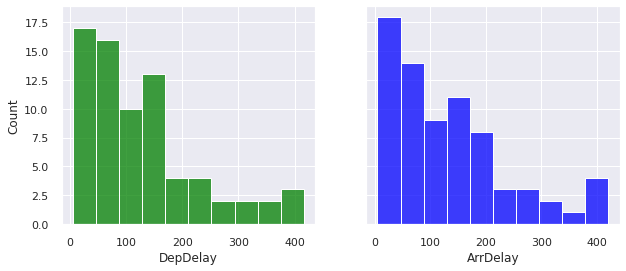

In [71]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_4, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_4, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [72]:
df_cluster_5 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 5]
df_cluster_5.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
34   6962945.0   12.0        17.0        3.0   2325.0      2115.0    721.0   
137  1110257.0    2.0        11.0        1.0   2145.0      2035.0    113.0   
140  3217123.0    6.0        18.0        3.0   2301.0      2225.0    716.0   
206  1245738.0    3.0        24.0        1.0   2011.0      2000.0     52.0   
207   525770.0    1.0        21.0        1.0   2107.0      2100.0   2357.0   

     CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
34        539.0       3.045947  0.051626              296.0           324.0   
137        25.0       2.426433  0.051626              148.0           170.0   
140       648.0       7.847186  0.051626              315.0           323.0   
206        55.0      20.030976  0.051626              161.0           175.0   
207         5.0       8.776458  0.051626              170.0           185.0   

     AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
34     271.0     102.0     130.0  1.600413  1.703665    2693.0     4.0   
137    132.0      48.0      70.0  1.548787  2.168301    1107.0     4.0   
140    284.0      28.0      36.0  3.304078  2.271554    2475.0     7.0   
206    147.0      -3.0      11.0  3.097574  1.393908    1235.0     3.0   
207    153.0      -8.0       7.0  1.135777  1.703665    1258.0     7.0   

     TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
34      21.0     31.000000      0.000000   0.000000       0.000000   
137     12.0      0.000000      0.000000   0.000000       0.000000   
140     24.0     28.000000      0.000000   0.000000       0.000000   
206     11.0     18.381403      4.008668  15.340426       0.043341   
207     10.0     18.381403      4.008668  15.340426       0.043341   

     LateAircraftDelay         PC 1         PC 2         PC 3         PC 4  \
34           71.000000   444.399255  1763.556776  1435.074937  1254.372227   
137          48.000000  1112.115660   108.394176  1668.417913  1297.939003   
140           0.000000   346.729919  1561.454086  1462.689334  1161.650884   
206          24.799842  1214.842110   243.797572  1651.133099  1207.649405   
207          24.799842   -91.276399   370.190531   -66.651033  2004.758996   

           PC 5       PC 6       PC 7       PC 8       PC 9      PC 10  \
34   -61.121513  62.179955  -2.253855 -68.359179  65.695751   8.963372   
137   24.214852 -15.841850 -17.005241 -23.862960  19.065314  12.443234   
140   47.341932 -48.552019  29.787194  -2.458360  18.020857  13.083449   
206   91.850750 -79.090495   7.090913  -6.672828  26.290122  -3.067153   
207  236.744209  -0.202098  -1.444062  -8.321296  17.695105   2.777138   

     Kmeans PCA  
34            5  
137           5  
140           5  
206           5  
207           5

In [73]:
df_cluster_5.describe().round(3)

ID   Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count       36.000  36.000      36.000     36.000    36.000      36.000   
mean   2936277.250   5.333      14.028      3.639  2158.972    2107.667   
std    2031712.961   3.489       8.862      1.775   170.112     164.861   
min     222499.000   1.000       1.000      1.000  1634.000    1600.000   
25%    1070274.250   2.000       6.000      2.000  2119.000    2050.000   
50%    2881940.000   5.000      14.500      4.000  2220.000    2135.000   
75%    3912617.750   7.000      21.250      5.000  2268.750    2215.000   
max    6962945.000  12.000      30.000      7.000  2356.000    2325.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count    36.000        36.0         36.000   36.000             36.000   
mean    308.861       201.5          8.001    0.076            202.111   
std     444.558       273.3          5.886    0.049             82.451   
min       3.000         1.0          2.426    0.052             65.000   
25%      44.000        11.5          3.046    0.052            144.250   
50%     109.500        27.5          6.608    0.052            173.500   
75%     532.500       505.5          8.776    0.103            282.250   
max    2357.000       747.0         20.031    0.310            388.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay  Origin    Dest  Distance  \
count          36.000   36.000    36.000    36.000  36.000  36.000    36.000   
mean          208.278  178.722    26.250    32.417   2.515   1.780  1505.389   
std            84.811   82.762    28.887    29.911   1.814   1.101   785.413   
min            71.000   44.000   -20.000     7.000   0.155   0.052   235.000   
25%           150.000  120.750     5.500    12.000   1.213   1.084   935.750   
50%           175.500  149.500    21.000    21.500   2.323   1.704  1214.500   
75%           288.000  260.000    39.000    36.250   3.149   2.272  2188.250   
max           399.000  370.000   102.000   130.000   6.711   4.543  3329.000   

       TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
count  36.000   36.000        36.000        36.000    36.000         36.000   
mean    6.889   16.500        14.204         1.559     9.188          0.017   
std     4.228    5.464        10.935         1.982     8.183          0.021   
min     3.000    8.000         0.000         0.000     0.000          0.000   
25%     4.000   13.000         1.750         0.000     0.000          0.000   
50%     6.000   15.500        18.381         0.000    14.500          0.000   
75%     9.000   19.500        18.381         4.009    15.340          0.043   
max    21.000   33.000        43.000         4.009    28.000          0.043   

       LateAircraftDelay      PC 1      PC 2      PC 3      PC 4     PC 5  \
count             36.000    36.000    36.000    36.000    36.000   36.000   
mean              25.117   888.617   533.372  1586.040  1261.170   70.149   
std               20.639   404.411   822.433   314.950   156.002   47.530   
min                0.000   -91.276  -780.567   -66.651  1093.906  -61.122   
25%               13.500   517.322   -73.952  1483.822  1171.139   46.968   
50%               24.800  1017.133   218.082  1639.269  1241.401   80.999   
75%               25.850  1119.176  1265.966  1747.469  1312.689   92.605   
max               91.000  1640.172  2434.696  1847.660  2004.759  236.744   

         PC 6    PC 7    PC 8    PC 9   PC 10  Kmeans PCA  
count  36.000  36.000  36.000  36.000  36.000        36.0  
mean  -46.991   3.419  -4.533  17.401   5.084         5.0  
std    36.642  14.271  22.419  19.517   6.145         0.0  
min   -91.558 -35.466 -68.359 -17.823  -4.021         5.0  
25%   -71.503  -3.101 -16.048   3.796  -1.081         5.0  
50%   -59.077   4.968  -7.014  18.543   5.222         5.0  
75%   -29.165   8.319   7.733  28.636  11.082         5.0  
max    62.180  31.102  44.342  65.696  13.940         5.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

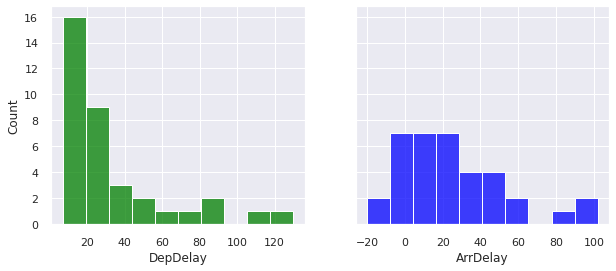

In [74]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_5, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_5, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [75]:
df_cluster_6 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 6]
df_cluster_6.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
17  2785746.0    5.0        25.0        7.0    848.0       840.0   1010.0   
18  1747516.0    3.0        21.0        5.0    836.0       825.0   1029.0   
19  1972274.0    4.0        23.0        3.0   1029.0      1015.0   1303.0   
26  3414618.0    6.0        16.0        1.0    906.0       830.0   1024.0   
27  4307120.0    8.0        25.0        1.0    902.0       840.0   1020.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
17      1005.0       7.176045  0.154879               82.0            85.0   
18      1038.0       4.801239  0.103252              173.0           193.0   
19      1252.0       6.917914  0.051626               94.0            97.0   
26       945.0       7.176045  0.051626               78.0            75.0   
27      1000.0      20.030976  0.051626               78.0            80.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
17     58.0       5.0       8.0  0.103252  3.510583     364.0    12.0   
18    158.0      -9.0      11.0  0.826020  1.806918    1091.0     5.0   
19     67.0      11.0      14.0  3.768715  0.103252     517.0     4.0   
26     44.0      39.0      36.0  1.393908  2.271554     187.0    13.0   
27     67.0      20.0      22.0  1.032525  1.084151     461.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
17     12.0     18.381403      4.008668  15.340426       0.043341   
18     10.0     18.381403      4.008668  15.340426       0.043341   
19     23.0     18.381403      4.008668  15.340426       0.043341   
26     21.0     24.000000      0.000000   3.000000       0.000000   
27      6.0     16.000000      0.000000   0.000000       0.000000   

    LateAircraftDelay         PC 1        PC 2        PC 3       PC 4  \
17          24.799842  1261.276612 -422.248496 -142.709088 -67.471752   
18          24.799842  1270.254513  324.742441 -116.858641 -39.552883   
19          24.799842   813.205370 -249.090951 -198.009766 -69.943035   
26          12.000000  1255.462841 -604.396169 -146.660316  -7.541743   
27           4.000000  1235.255721 -330.313854 -121.001575 -33.066987   

         PC 5       PC 6       PC 7       PC 8       PC 9     PC 10  \
17   4.959803 -40.842351  -4.432983  -5.122296   1.130084 -9.077176   
18  -3.975395 -49.687002  -7.925398  -3.061657 -11.750180 -8.250825   
19  10.780584 -31.741841  -2.314186  -7.483742   8.005951 -7.933970   
26 -40.508713  -6.593835   7.199647   4.595181 -19.752795  2.425561   
27 -31.763785 -34.655046  11.653824 -13.248502  17.431595  6.674257   

    Kmeans PCA  
17           6  
18           6  
19           6  
26           6  
27           6

In [76]:
df_cluster_6.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      352.000  352.000     352.000    352.000   352.000     352.000   
mean   3192645.486    5.895      15.247      3.724   921.366     895.077   
std    2143594.893    3.617       8.631      1.947   222.376     236.996   
min       4601.000    1.000       1.000      1.000    12.000      10.000   
25%    1303518.000    3.000       8.000      2.000   803.750     731.750   
50%    2999737.500    5.500      15.000      4.000   939.000     915.000   
75%    5147902.000    9.000      22.000      5.000  1109.250    1037.750   
max    7008745.000   12.000      31.000      7.000  1257.000    2359.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   352.000     352.000        352.000  352.000            352.000   
mean   1090.087    1047.159          8.075    0.077            101.411   
std     216.483     213.494          6.090    0.038             37.784   
min     106.000      26.000          0.620    0.052             34.000   
25%     945.000     917.250          4.130    0.052             72.750   
50%    1122.000    1050.000          6.608    0.052             92.000   
75%    1243.250    1215.000          8.080    0.103            127.250   
max    1619.845    2227.000         20.031    0.207            234.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         352.000  352.000   352.000   352.000  352.000  352.000   
mean          101.912   77.862    32.741    33.449    2.183    1.844   
std            37.658   35.299    42.354    38.575    2.095    1.517   
min            42.000   18.000   -24.000     6.000    0.052    0.052   
25%            73.000   50.000     8.000    11.000    0.465    0.671   
50%            92.000   70.000    19.500    19.000    1.394    1.394   
75%           126.250  103.250    42.118    41.250    3.098    2.685   
max           207.000  187.000   285.000   305.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   352.000  352.000  352.000       352.000       352.000   352.000   
mean    498.730    6.325   17.270        19.916         5.617    13.167   
std     292.077    3.896   11.523        27.207        22.474    20.457   
min      78.000    1.000    5.000         0.000         0.000     0.000   
25%     260.500    4.000   10.000         0.000         0.000     0.000   
50%     418.500    5.000   13.500        18.381         0.000    15.340   
75%     686.000    8.000   21.250        18.381         4.009    15.340   
max    1609.000   27.000   85.000       261.000       285.000   196.000   

       SecurityDelay  LateAircraftDelay      PC 1     PC 2     PC 3      PC 4  \
count        352.000            352.000   352.000  352.000  352.000   352.000   
mean           0.094             16.847  1140.112 -282.404 -137.563   -29.177   
std            1.127             20.778   375.471  301.864  122.332   116.685   
min            0.000              0.000   605.666 -714.417 -605.818 -1346.766   
25%            0.000              0.000   813.088 -524.394 -179.497   -55.615   
50%            0.000             20.500  1080.605 -365.403 -137.258   -30.648   
75%            0.043             24.800  1408.620  -92.560 -101.028     6.845   
max           20.000            192.000  2649.116  835.988  846.699   514.488   

           PC 5     PC 6     PC 7     PC 8     PC 9    PC 10  Kmeans PCA  
count   352.000  352.000  352.000  352.000  352.000  352.000       352.0  
mean     -7.759   -7.645    0.747    0.917   -1.809    1.533         6.0  
std     160.386   63.067   27.925   23.275   18.303   24.028         0.0  
min    -215.558  -64.462 -125.511  -82.048  -89.936  -57.257         6.0  
25%     -41.548  -38.138   -9.448  -10.515   -9.916   -8.283         6.0  
50%      -9.132  -30.839   -3.633   -3.657   -1.342   -1.733         6.0  
75%       6.614   -1.557    5.851    6.244    7.623    4.777         6.0  
max    16

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

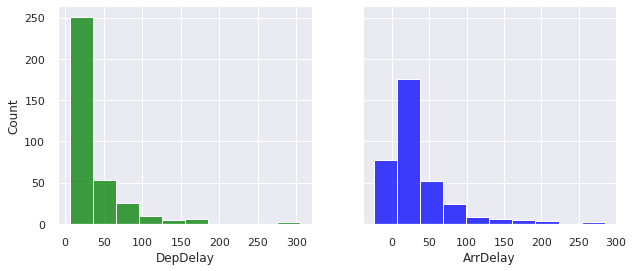

In [77]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_6, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_6, x="ArrDelay",color="blue", ax=ax2, bins=10);

# Exercise 3: 
  - Calculate clustering performance using a parameter such as silhouette.

# Silhouette Visualizer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

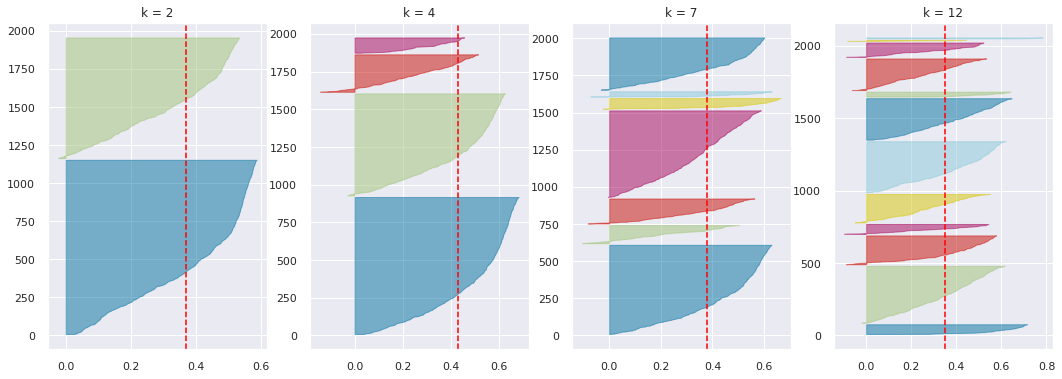

In [78]:
# SilhouetteVisualizer
# ==============================================================================

fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(18,6),nrows=1,ncols=4)

#ax1
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=6858), colors='yellowbrick',ax=ax1)
visualizer.fit(PCA_components)       # Fit the data to the visualizer
ax1.set_title('k = 2')               # Title

#ax2
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=6858), colors='yellowbrick',ax=ax2)
visualizer2.fit(PCA_components)      # Fit the data to the visualizer
ax2.set_title('k = 4')               # Title

#ax3
visualizer3 = SilhouetteVisualizer(KMeans(n_clusters=7, random_state=6858), colors='yellowbrick',ax=ax3)
visualizer3.fit(PCA_components)       # Fit the data to the visualizer
ax3.set_title('k = 7');               # Title

#ax4
visualizer4 = SilhouetteVisualizer(KMeans(n_clusters=12, random_state=6858), colors='yellowbrick',ax=ax4)
visualizer4.fit(PCA_components)       # Fit the data to the visualizer
ax4.set_title('k = 12');              # Title   

plt.savefig("../reports/figures/Silhouette_Visualizer.png");

In [79]:
sil0 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 2, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil1 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil2 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil3 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 12, n_init = 12, random_state=6858).fit(PCA_components)).labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
silhouette = pd.DataFrame({'Meassure': ['2 Clusters' ,'4 Clusters', '7 Clusters', '12 Clusters'],
                            'Scores': [sil0,sil1,sil2,sil3]
                            })

<IPython.core.display.Javascript object>

## Silhouette Score

In [81]:
silhouette

Meassure    Scores
0   2 Clusters  0.370330
1   4 Clusters  0.430420
2   7 Clusters  0.378260
3  12 Clusters  0.331722

# Exercise 2: 
  - Classify the different flights using the hierarchical clustering algorithm.

# Hierarchical Clustering

In [82]:
import scipy.cluster.hierarchy as sch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

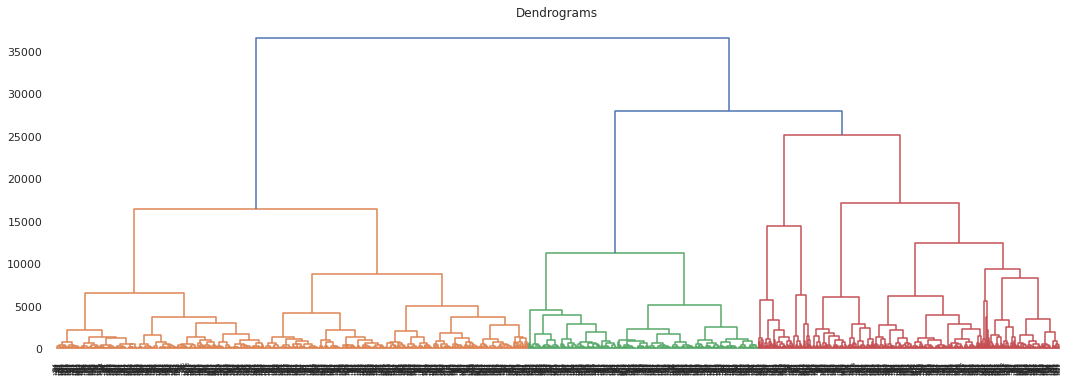

In [83]:
plt.figure(figsize=(18, 6)) 
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'))
plt.axhline(y= 60000, color='r', linestyle='--')
plt.savefig("../reports/figures/Dendogram.png")

### Agglomerative hierarchical clustering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

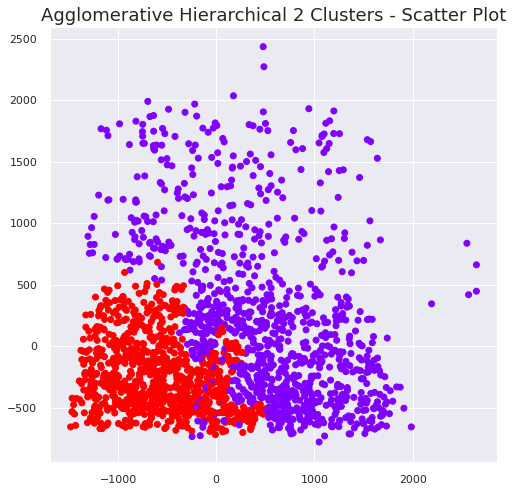

In [84]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 2 Clusters - Scatter Plot", fontsize=18)
plt.savefig("../reports/figures/Agglomerative_Hierarchical_2_Clusters.png")
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

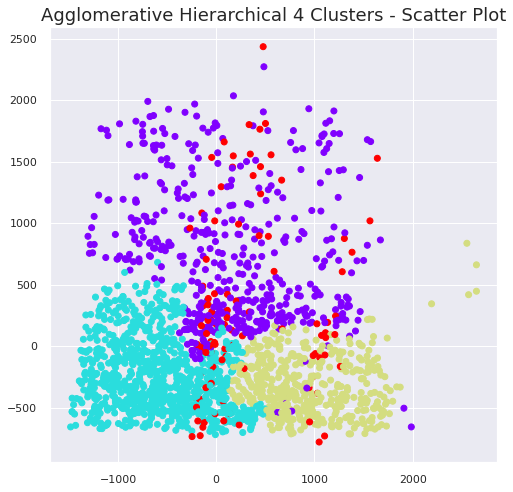

In [85]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 4 Clusters - Scatter Plot", fontsize=18)
plt.savefig("../reports/figures/Agglomerative_Hierarchical_4_Clusters.png")
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

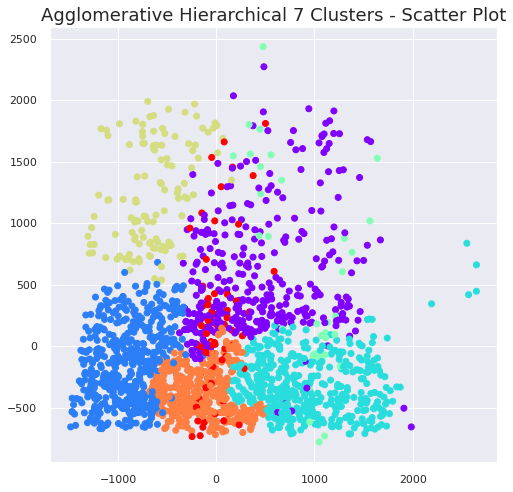

In [86]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 7, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 7 Clusters - Scatter Plot", fontsize=18)
plt.savefig("../reports/figures/Agglomerative_Hierarchical_7_Clusters.png");
plt.show();

In [87]:
agc.fit(PCA_components)

AgglomerativeClustering(n_clusters=7)

In [88]:
labels_hier = agc.labels_
labels_hier[:20]

array([2, 5, 0, 5, 4, 5, 1, 0, 1, 5, 1, 5, 1, 0, 0, 5, 0, 2, 0, 2])

In [89]:
df_hier_pca = agc.fit(PCA_components)

In [90]:
clusters_all_pca = pd.concat([df_pca_kmeans, pd.DataFrame({'PCA Clusters Hier':labels_hier})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
clusters_all_pca.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

          PC 1         PC 2        PC 3        PC 4        PC 5        PC 6  \
0   466.419289  -415.399646  -39.356893  134.649349  -87.181874   53.904575   
1  -523.522600  -404.861482  -74.536857  -33.841121   54.827191  -30.100088   
2  1459.539018  1370.667238 -181.584072  -24.282052  -52.673751  -37.362012   
3  -202.848225  -518.079918  -40.025446  -10.710267    6.568661  -34.908206   
4  -420.034300  1704.779232 -524.782081  -44.643981 -207.243495  183.649618   

        PC 7        PC 8       PC 9     PC 10  Kmeans PCA  PCA Clusters Hier  
0 -42.900505  -44.018649   2.475975  1.171664           3                  2  
1  -0.112881   47.822912 -53.373227  0.556085           0                  5  
2 -19.905503   35.520377 -39.656835  5.969360           1                  0  
3  -1.828175   -7.157681   3.098262  8.421375           3                  5  
4 -99.374604 -108.356473  15.633939 -9.766605           2                  4

### Visualize Cluster Distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

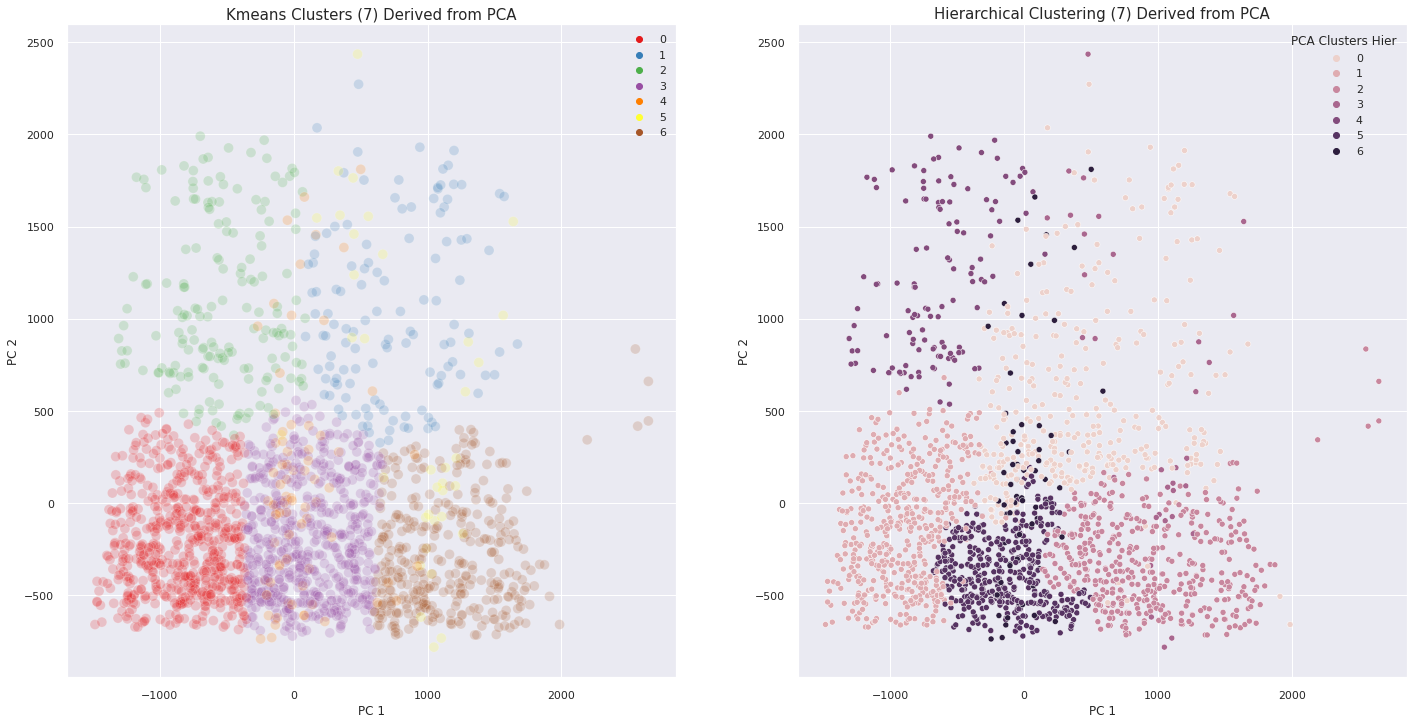

In [92]:
# Scatter plot using the first 2 Principal Components to observe the Cluster Distribution

plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
sns.scatterplot(x= 'PC 1', y='PC 2',
                data= clusters_all_pca,
                hue = labels_pca, palette='Set1', s= 100,
                alpha= 0.2).set_title('Kmeans Clusters (7) Derived from PCA',
                fontsize= 15)



plt.subplot(1,2,2)
sns.scatterplot(x= 'PC 1', y='PC 2',
                data= clusters_all_pca, 
                hue= 'PCA Clusters Hier').set_title('Hierarchical Clustering (7) Derived from PCA',
                fontsize=15);

plt.savefig("../reports/figures/Visualize_Cluster_Distribution.png");